# Paper plots

### Imports

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import matplotlib
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
from pathlib import Path
from tqdm import tqdm
from pypalettes import load_cmap
import scipy.stats as st
import yaml
import re
import datetime as dt
from itertools import cycle, islice
import matplotlib.patheffects as patheffects

from mof_benchmark.analysis.plot.plots import style
from mof_benchmark.experiments.scripts.utils import structure_to_files

In [2]:
base_dir = Path("../../")

In [3]:
import os

In [4]:
from ase.eos import EquationOfState
from ase import units

In [5]:
from sklearn.metrics import root_mean_squared_error, r2_score, mean_absolute_percentage_error
rmse = root_mean_squared_error
mae = lambda x, y: np.mean(np.abs(x-y))

In [6]:
import matplotlib.patches as patches

In [7]:
def adjust_lightness(color, amount=0.5):
    import matplotlib.colors as mc
    import colorsys
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return '#%02x%02x%02x' % tuple([int(v * 255) for v in colorsys.hls_to_rgb(c[0], max(0, min(1, amount * c[1])), c[2])])

In [8]:
from tueplots import cycler

cmap = load_cmap("Prism")
palette = cmap.colors

plt.rcParams.update(style(column="full", family="sans-serif"))
plt.rcParams.update(cycler.cycler(color=palette))

In [9]:
RED = "#ff1735"
RED_DARK = "#8c061b"
BLACK = "#111"
GREY_DARK = "#37474F" # "#333"
GREY_LIGHT = "#CFD8DC" # "#ccc"
GREY = "#546E7A" # "#555"

In [10]:
text_bbox = dict(facecolor="#ffffffaa", edgecolor="None", boxstyle="round,pad=0.1")

In [11]:
show_hlines = True

## General settings

In [12]:
calc_names = {
    "grace_prod": "GRACE-2L-MP-r6\n+ D3",
    "grace_prod_oam": "GRACE-2L-OAM\n+ D3",
    "grace_prod_omat": "GRACE-2L-OMAT\n+ D3",
    "mace_b3": "MACE-MP-0b3",
    "mace_prod_b3": "MACE-MP-0b3\n+ D3",
    "mace_prod_0a": "MACE-MP-0a\n+ D3",
    "mace_prod_mof": "MACE-MP-MOF0",
    "mace_prod_dac": "MACE-DAC-1 + D3",
    "mace_prod": "MACE-MPA-0\n+ D3",
    "mace_prod_omat": "MACE-OMAT-0\n+ D3",
    "mace_prod_matpes": "MACE-MATPES-r2SCAN-0\n+ D3",
    "mattersim_prod": "MatterSim-v1.0.0-5M\n+ D3",
    "omat24_prod_mp": "eqV2-M-DeNS + D3",
    "omat24_prod": "eqV2-M OMat\nMPtrj-sAlex + D3",
    "omat24_prod_esen_mp": "eSEN-30M-MP\n+ D3",
    "omat24_prod_esen": "eSEN-30M-OAM\n+ D3",
    "orb_prod_mp": "orb-mptraj-only-v2\n+ D3",
    "orb_prod": "orb-d3-v2",
    "orb_prod_v3_mp": "orb-v3-con-inf-mpa\n+ D3",
    "orb_prod_v3": "orb-v3-con-inf-omat\n+ D3",
    "sevennet_prod": "SevenNet-0\n+ D3",
    "sevennet_prod_l3i5": "SevenNet-l3i5\n+ D3",
    "sevennet_prod_ompa": "SevenNet-mf-ompa\n+ D3",
    "sevennet_prod_ompa_omat": "SevenNet-mf-ompa\n+ D3",
    "posegnn_prod_v2": "PosEGNN + D3",
    "UFF4MOF": "UFF4MOF",
    "UFF4MOF_fm": "UFF4MOF fix-metal",
    "UFF": "UFF",
    "UFF_fm": "UFF fix-metal",
}

In [13]:
calc_selection = [
    "mace_prod_mof",
    "mace_prod_0a",
    "mace_prod_omat",
    "orb_prod",
    "omat24_prod",
    "sevennet_prod_ompa_omat",
    "grace_prod_omat",
    "mattersim_prod",
    "omat24_prod_esen",
    "orb_prod_v3",
]

all_calcs = [
    "mace_prod_mof",
    "mace_prod_0a",
    "mace_prod_b3",
    "mace_prod",
    "mace_prod_omat",
    "orb_prod_mp",
    "orb_prod",
    "omat24_prod_mp",
    "omat24_prod",
    "sevennet_prod",
    "sevennet_prod_l3i5",
    "sevennet_prod_ompa_omat",
    "grace_prod",
    "grace_prod_oam",
    "grace_prod_omat",
    "mattersim_prod",
    "omat24_prod_esen_mp",
    "omat24_prod_esen",
    "orb_prod_v3_mp",
    "orb_prod_v3",
]

release_dates = np.array([
    "2024-12-03", # mace_prod_mof
    "2023-12-29", # mace_prod_0a
    "2024-12-17", # mace_prod_b3
    "2024-12-17", # mace_prod
    "2025-01-15", # mace_prod_omat
    "2024-10-29", # orb_prod_mp
    "2024-10-29", # orb_prod
    "2024-10-16", # omat24_prod_mp
    "2024-10-16", # omat24_prod
    "2024-07-24", # sevennet_prod
    "2024-12-12", # sevennet_prod_l3i5
    "2025-03-17", # sevennet_prod_ompa
    "2024-11-11", # grace_prod
    "2025-01-28", # grace_prod_oam
    "2025-03-11", # grace_prod_omat
    "2024-05-13", # mattersim_prod
    "2025-02-17", # omat24_prod_esen_mp
    "2025-02-17", # omat24_prod_esen
    "2025-04-08", # orb_prod_v3_mp
    "2025-04-08", # orb_prod_v3
], dtype="datetime64")

cmap_all = [
    palette[0], # mace_prod_mof
    palette[3], # mace_prod_0a
    adjust_lightness(palette[3], 1.15), # mace_prod_b3
    adjust_lightness(palette[3], 1.3), # mace_prod
    adjust_lightness(palette[3], 1.45), # mace_prod_omat
    palette[6], # orb_prod_mp
    adjust_lightness(palette[6], 1.15), # orb_prod
    palette[2], # omat24_prod_mp
    adjust_lightness(palette[2], 1.15), # omat24_prod
    palette[7], # sevennet_prod
    adjust_lightness(palette[7], 1.1), # sevennet_prod_l3i5
    adjust_lightness(palette[7], 1.2), # sevennet_prod_ompa
    palette[5], # grace_prod
    adjust_lightness(palette[5], 1.2), # grace_prod_oam
    adjust_lightness(palette[5], 1.4), # grace_prod_omat
    palette[1], # mattersim_prod
    palette[4], # omat24_prod_esen_mp
    adjust_lightness(palette[4], 1.2), # omat24_prod_esen
    adjust_lightness(palette[6], 1.3), # orb_prod_v3_mp
    adjust_lightness(palette[6], 1.45), # orb_prod_v3
]
cmap_selection = [cmap_all[all_calcs.index(calc)] for calc in calc_selection]

In [14]:
def density_estimation(x, y=None, density_basis=None):
    """Estimate with gaussian kernel density method. Sort by log-density."""
    x = np.asarray(x)

    if y is not None:
        y = np.asarray(y)
        xy_stack = np.vstack([x, y])
    else:
        xy_stack = x[None, :]
    threshold = 500
    z = st.gaussian_kde(xy_stack[:, np.random.choice(x.shape[0], threshold, replace=False)] if len(x) > threshold else xy_stack)(xy_stack)
    z_sort = np.argsort(z)
    x = x[z_sort]
    if y is not None:
        y = y[z_sort]
    z = z[z_sort]
    z = np.log(z - np.min(z) + 1)  # ensure valid log domain
    if density_basis is not None:
        z /= np.log(density_basis)
    return x, y, z, z_sort

def scatter_density(x, y, ax, **kwargs):
    x, y, z, _ = density_estimation(x, y)
    ax.scatter(x, y, c=z, **kwargs)

In [60]:
def generate_violin_plot(y_data, ax, colors=None, scatter_kwargs={}, scatter_rasterized=False, plot_density=True, density_basis=None):
    POSITIONS = np.arange(len(y_data))
    
    violins = ax.violinplot(
        y_data, 
        positions=POSITIONS,
        widths=0.65,
        bw_method="silverman",
        showmeans=False, 
        showmedians=False,
        showextrema=False,
    )
    
    for pc in violins["bodies"]:
        pc.set_facecolor("none")
        pc.set_edgecolor(BLACK)
        pc.set_linewidth(0.7)
        pc.set_alpha(1)
        pc.set_zorder(2)
    
    ### BOXPLOT
    
    medianprops = dict(
        linewidth=1, 
        color=RED_DARK,
        solid_capstyle="butt"
    )
    boxprops = dict(
        linewidth=0.8, 
        color=GREY_DARK
    )
    
    ax.boxplot(
        y_data,
        positions=POSITIONS, 
        showfliers = False, # Do not show the outliers beyond the caps.
        showcaps = False,   # Do not show the caps
        medianprops = medianprops,
        whiskerprops = boxprops,
        boxprops = boxprops,
        widths=0.4
    )
    
    jitter = 0.06
    x_data = [np.array([i] * len(d)) for i, d in enumerate(y_data)]
    x_jittered = [x + st.t(df=6, scale=jitter).rvs(len(x), random_state=0) for x in x_data]

    cmap =  matplotlib.colormaps["mako"]
    hex_values = [matplotlib.colors.rgb2hex(cmap(i)) for i in np.linspace(0, 1, 6)]

    colors = colors or list(islice(cycle(palette), len(x_jittered)))
    
    for x, y, color in zip(x_jittered, y_data, colors):
        x = np.asarray(x)
        y = np.asarray(y)

        _defaults = {"s": 20, "alpha": 0.5, "rasterized": scatter_rasterized}
        if plot_density:
            _, _, z, z_sort = density_estimation(y, density_basis=density_basis)
            adapted_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", [color] + hex_values[3:])
            ax.scatter(x[z_sort], y[z_sort], **{"c": z, "cmap": adapted_cmap if plot_density else color, **_defaults, **scatter_kwargs})
        else:
            ax.scatter(x, y, **{"c": color, **_defaults, **scatter_kwargs})

    return ax

# Optimization

In [16]:
optimization_results_file = (
    base_dir / "analysis" / "results" / "optimization_results.parquet"
)

optimization_rmsd = pd.read_parquet(optimization_results_file)
selected_settings = "optimization.yaml"

df = optimization_rmsd
df = df[df.index.get_level_values("settings").str.endswith(selected_settings)]

In [17]:
# initial structures vs dft
rmsd_experimental_to_dft = np.asarray([1.51300977, 0.52366041, 2.5872095, 2.91469591, 0.62078246, 3.98770929, 0.45760085, 2.44440829, 0.52093554, 0.39179915, 0.16593501, 2.3093359, 2.40593929, 0.27938263, 3.41304821, 3.36022029, 6.08912896, 3.46009604, 0.07802425, 0.20937194, 7.72162355, 0.10754219, 7.38415897, 0.08448259, 4.06418549, 6.96467978, 0.24750341, 10.33001237])
volume_change_exp_to_dft = np.asarray([0.04677049528537217,0.002029825842398824,0.028388028484265537,-0.02353915072588361,-0.06183869011034222,-0.012718032949551006,0.057433662309718275,0.01946988276634999,0.0034174478215002694,-0.01578801090945494,-0.01741101309029063,-0.009108529636912652,0.006022389961253198,0.006474400297147039,0.033914795223985265,0.06539443058769792,0.021308923095620227,0.08053422908303565,0.008490433136759819,0.004775444048641929,0.024960223876645888,0.0280740526762165,-0.014969280219698403,0.014440539590907653,0.035673447649345616,-0.0012502359317376301,-0.0018911648451582443,0.01318004430810435])

### Volume vs DFT

In [18]:
structures = []
vol_diffs = []
vol_diffs_1000 = []
vol_diffs_dft = []
vol_diffs_dft_1000 = []
last_steps = []
failed_structures = []

for calc in tqdm(all_calcs):
    calc_structures = []
    calc_volume_change_rel_dft = []
    calc_volume_change_rel_dft_1000 = []
    calc_volume_change_rel = []
    calc_volume_change_rel_1000 = []
    calc_last_steps = []

    df_calc = df[df.index.get_level_values("calculator") == calc]
    for structure in df_calc.index.get_level_values("structure").unique():
        
        row = df_calc[df_calc.index.get_level_values("structure") == structure].iloc[0]

        # Get last step volume vs DFT volume if DFT volume available
        if row["dft_volume"] is not None and not np.isnan(
            row["dft_volume"]
        ):
            calc_volume_change_rel_dft.append((row["volume"][-1] - row["dft_volume"]) / row["dft_volume"] * 100)
            calc_volume_change_rel_dft_1000.append((row["volume"][min(1000, len(row["volume"]) - 1)] - row["dft_volume"]) / row["dft_volume"] * 100)
        else:
            calc_volume_change_rel_dft.append(None)
            calc_volume_change_rel_dft_1000.append(None)

        # Get last step index
        calc_volume_change_rel.append((row["volume"][-1] - row["volume"][0]) / row["volume"][0] * 100)
        calc_volume_change_rel_1000.append((row["volume"][min(1000, len(row["volume"]) - 1)] - row["volume"][0]) / row["volume"][0] * 100)
        calc_structures.append(structure)
        calc_last_steps.append(row["step"][-1])

    structures.append(calc_structures)
    vol_diffs_dft.append(calc_volume_change_rel_dft)
    vol_diffs_dft_1000.append(calc_volume_change_rel_dft_1000)
    vol_diffs.append(calc_volume_change_rel)
    vol_diffs_1000.append(calc_volume_change_rel_1000)
    last_steps.append(calc_last_steps)

analysis_df = pd.DataFrame({
    "structure": structures,
    "vol_diff_dft": vol_diffs_dft,
    "vol_diff_dft_1000": vol_diffs_dft_1000,
    "vol_diff": vol_diffs,
    "vol_diff_1000": vol_diffs_1000,
    "last_step": last_steps,
    "calculator": all_calcs,
}).explode(["structure", "vol_diff_dft", "vol_diff", "vol_diff_dft_1000", "vol_diff_1000", "last_step"])

100%|██████████| 20/20 [00:00<00:00, 50.40it/s]


## Volume difference to DFT (no fine-tuned failed structures)

### Percent of failed (>+-10% volume) structures

In [19]:
failed_per_calculator = analysis_df[~analysis_df["vol_diff_dft"].isna()].groupby("calculator")["vol_diff_dft"].agg(lambda x: (np.abs(x) > 10).sum())
successfully_computed_per_calculator = analysis_df[~analysis_df["vol_diff_dft"].isna()].groupby("calculator")["vol_diff_dft"].agg(len)
percent_failed = failed_per_calculator / successfully_computed_per_calculator * 100
percent_failed

calculator
grace_prod                 18.000000
grace_prod_oam             16.000000
grace_prod_omat            14.000000
mace_prod                  20.000000
mace_prod_0a               20.000000
mace_prod_b3               25.000000
mace_prod_mof               8.333333
mace_prod_omat             16.000000
mattersim_prod             13.000000
omat24_prod                23.000000
omat24_prod_esen            6.000000
omat24_prod_esen_mp         9.000000
omat24_prod_mp             36.000000
orb_prod                   61.000000
orb_prod_mp                45.000000
orb_prod_v3                 6.000000
orb_prod_v3_mp             11.000000
sevennet_prod              10.000000
sevennet_prod_l3i5         11.000000
sevennet_prod_ompa_omat    12.000000
Name: vol_diff_dft, dtype: float64

In [20]:
non_existing = analysis_df[~analysis_df["vol_diff_dft"].isna()]["structure"].unique()

In [21]:
df = pd.read_csv("../dft_data/1st_2nd_final_filter_good_bulk_modulus_calc_info_combined.csv")

In [22]:
df["structure"].unique().shape

(100,)

### failed structures per calculator

In [23]:
temp = analysis_df[~analysis_df["vol_diff_dft"].isna()]
temp = temp[np.abs(temp["vol_diff_dft"]) > 10].groupby("calculator")["structure"].agg(list)
for i, calc in enumerate(temp.index):
    print(f"{calc} failed:")
    print(", ".join(temp.iloc[i]))

grace_prod failed:
gmof_Zn2O8-irmof8_A-NCO_A_No14, EKOKUN_full, gmof_AlO6-ADC_A_No11, 16050N2, core_DACFAR_freeONLY, CAMWOG_full, IXOFIL_full, IPAQOI_full, AGEDIC_full, core_MUNNUF_freeONLY, RWY_primitive, gmof_Al2O6-DPAC_B-irmof7_B_No1168, TAJXIO01_full, NIGGEQ_full, LUMQIU_full, KINFEU_full, IKEVEC_full, QUSJEW_full_primitive
grace_prod_oam failed:
gmof_Zn2O8-irmof8_A-NCO_A_No14, EKOKUN_full, MAQXIN01_full, 20561N3, IXOFIL_full, AGEDIC_full, core_MUNNUF_freeONLY, 13180N3, FOCJAL01_full, 21000N2, ANAWOD_full, TAJXIO01_full, NIGGEQ_full, LUMQIU_full, KINFEU_full, QUSJEW_full_primitive
grace_prod_omat failed:
QULMIU_full, gmof_Zn2O8-irmof8_A-NCO_A_No14, tobacco_srsb_sym_3_on_1_sym_3_mc_0_L_2, EKOKUN_full, OQOCOP_full, 16050N2, CAMWOG_full, IXOFIL_full, core_MUNNUF_freeONLY, ZOHQOF_full, RWY_primitive, NIGGEQ_full, KINFEU_full, COKPID_full
mace_prod failed:
gmof_Zn2O8-irmof8_A-NCO_A_No14, EKOKUN_full, HIQLIF_full, boydwoo_str_m3_o3_o27_pcu_sym_138, core_DACFAR_freeONLY, CAMWOG_full, IXOF

## Volume difference to DFT

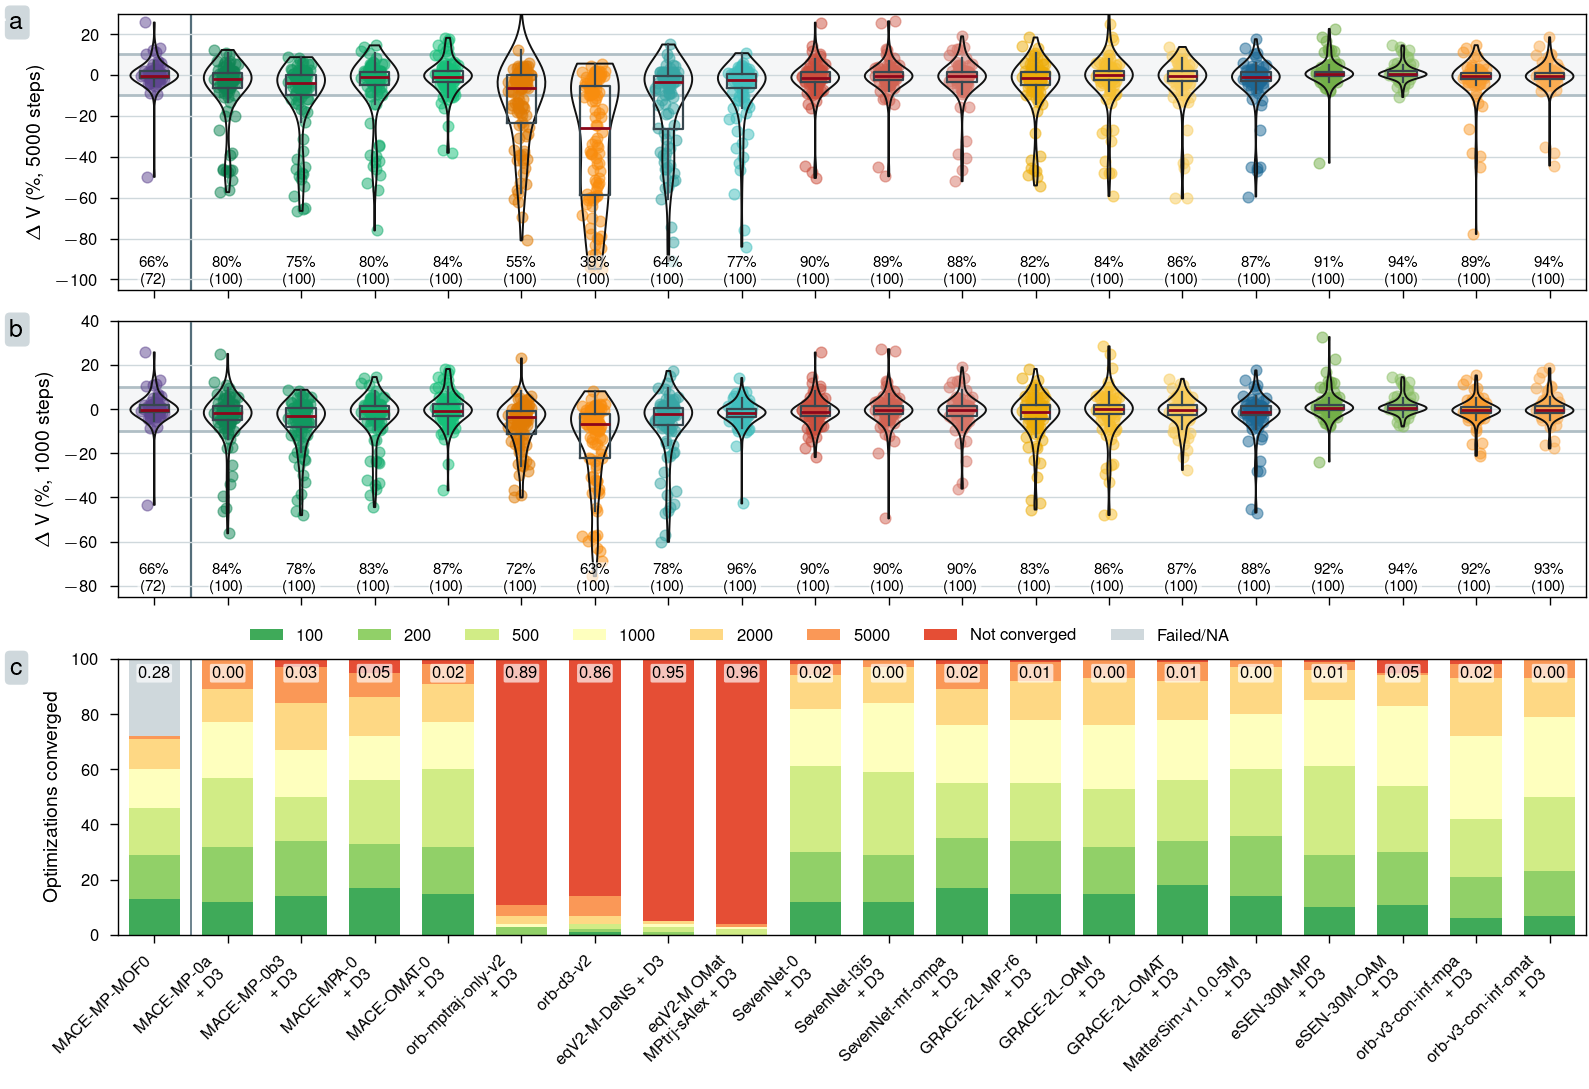

In [24]:
fig, axs = plt.subplots(3, 1, figsize=(8,5.5), sharex=True, constrained_layout=True)

ax = axs[0]

if show_hlines:
    ax.grid(axis="y", color=GREY_LIGHT, lw=0.5, zorder=-100)

y_data = analysis_df
y_data = y_data[~y_data["vol_diff_dft"].isna()]
y_data = y_data.groupby("calculator")["vol_diff_dft"].apply(list).loc[all_calcs]

## VIOLIN PLOT
generate_violin_plot(y_data, ax, plot_density=False, scatter_kwargs={"s": 15, "rasterized": True}, colors=cmap_all)

ax.set_xticks(np.arange(len(all_calcs)), [calc_names[key] for key in all_calcs], rotation=45, ha="right")
ax.set_ylim([-105,30])
ax.set_xlim([-0.5, len(all_calcs) - 0.5])

rect = patches.Rectangle((-1, 10), len(all_calcs)+1, -20, linewidth=1, edgecolor="#B0BEC5", facecolor="#B0BEC5" + "20", zorder=-10)
ax.add_patch(rect) 

for x, calc in enumerate(all_calcs):
    total = successfully_computed_per_calculator.loc[calc]
    succesful = total - failed_per_calculator.loc[calc]
    ax.text(x, -104, f"{succesful}\\%\n({total})", horizontalalignment="center", verticalalignment="bottom", size=5.5, bbox=text_bbox)


# vertical bar to separate MACE-MP-MOF0
ax.axvline(0.5, color=GREY, zorder=0, linewidth = 0.8)

ax.annotate(
    "a",
    xy=(-0.09, 1.1), xycoords="axes fraction",
    xytext=(+1, -1), textcoords="offset fontsize",
    fontsize="9", verticalalignment="top",
    bbox=dict(facecolor=GREY_LIGHT, edgecolor="none", boxstyle="round,pad=0.22,rounding_size=0.2")
)
ax.annotate(
    ".",
    c="white",
    xy=(-0.095, 1.13), xycoords="axes fraction",
    xytext=(+1, -1), textcoords="offset fontsize",
    fontsize="9", verticalalignment="top",
)

ax.set_ylabel("$\\Updelta$ V (\\%, 5000 steps)", size=7)

ax = axs[1]

if show_hlines:
    ax.grid(axis="y", color=GREY_LIGHT, lw=0.5, zorder=-100)

y_data = analysis_df
y_data = y_data[~y_data["vol_diff_dft"].isna()]
y_data = y_data.groupby("calculator")["vol_diff_dft_1000"].apply(list).loc[all_calcs]

failed_per_calculator_1000 = analysis_df[~analysis_df["vol_diff_dft_1000"].isna()].groupby("calculator")["vol_diff_dft_1000"].agg(lambda x: (np.abs(x) > 10).sum())
successfully_computed_per_calculator_1000 = analysis_df[~analysis_df["vol_diff_dft_1000"].isna()].groupby("calculator")["vol_diff_dft_1000"].agg(len)

## VIOLIN PLOT
generate_violin_plot(y_data, ax, plot_density=False, scatter_kwargs={"s": 15, "rasterized": True}, colors=cmap_all)

ax.set_xticks(np.arange(len(all_calcs)), [calc_names[key] for key in all_calcs], rotation=45, ha="right")
ax.set_ylim([-85,40])

rect = patches.Rectangle((-1, 10), len(all_calcs)+1, -20, linewidth=1, edgecolor="#B0BEC5", facecolor="#B0BEC5" + "20", zorder=-10)
ax.add_patch(rect) 

for x, calc in enumerate(all_calcs):
    total = successfully_computed_per_calculator_1000.loc[calc]
    succesful = total - failed_per_calculator_1000.loc[calc]
    ax.text(x, -84, f"{succesful}\\%\n({total})", horizontalalignment="center", verticalalignment="bottom", size=5.5, bbox=text_bbox)


# vertical bar to separate MACE-MP-MOF0
ax.axvline(0.5, color=GREY, zorder=0, linewidth = 0.8)

ax.set_ylabel("$\\Updelta$ V (\\%, 1000 steps)", size=7)
ax.annotate(
    "b",
    xy=(-0.09, 1.1), xycoords="axes fraction",
    xytext=(+1, -1), textcoords="offset fontsize",
    fontsize="9", verticalalignment="top",
    bbox=dict(facecolor=GREY_LIGHT, edgecolor="none", boxstyle="round,pad=0.22,rounding_size=0.2")
)

ax = axs[2]

max_structures = 100

bins = [100, 200, 500, 1000, 2000, 5000, 5001]

category_colors = plt.colormaps["RdYlGn"](np.linspace(0.15, 0.85, len(bins)))[::-1]

y_data = analysis_df
y_data = y_data[~y_data["last_step"].isna()]
y_data = y_data.groupby("calculator")["last_step"].apply(list).loc[all_calcs]

for i, calc in enumerate(all_calcs):
    count = 0

    last_step = y_data.loc[calc]
    
    maxcount = 1 # len(last_step)
    ls = np.array(last_step)
    for j, bin in enumerate(bins):
        bin_count = (ls < bin).sum() - count
        #print(bin_count)
        bar = ax.bar(i, bin_count / maxcount, bottom=count / maxcount, color=category_colors[j], width=0.7).patches[-1]
        # if bin_count > 0:
        #     ax.text(i, bar.get_y()+bar.get_height()/2, bin_count, color = "k", ha = "center", va = "center") 
        count = (ls < bin).sum()
        
    ax.bar(i, (max_structures - maxcount) / maxcount, bottom=count / maxcount, color=GREY_LIGHT, width=0.7)

    #print("----")
    ax.text(i, 92, f"{(bin_count + (max_structures - count)) / max_structures:.2f} %", horizontalalignment="center", verticalalignment="bottom", size=6, bbox=text_bbox)

ax.legend([100, 200, 500, 1000, 2000, 5000, "Not converged", "Failed/NA"], bbox_to_anchor=(0.08,1), ncols=8,
              loc="lower left", frameon=False)
ax.set_xticks(np.arange(len(all_calcs)), [calc_names[key] for key in all_calcs], rotation=45, ha="right")
# ax.set_xticks(np.linspace(0,1,11), np.arange(0,101,10))
ax.set_ylabel("Optimizations converged", size=7)

# ax.axhline(77, color=GREY, zorder=0, linewidth = 0.6)
ax.axvline(0.5, color=GREY, zorder=0, linewidth = 0.6)
ax.set_ylim([0,max_structures])

ax.annotate(
    "c",
    xy=(-0.09, 1.1), xycoords="axes fraction",
    xytext=(+1, -1), textcoords="offset fontsize",
    fontsize="9", verticalalignment="top",
    bbox=dict(facecolor=GREY_LIGHT, edgecolor="none", boxstyle="round,pad=0.22,rounding_size=0.2")
)

#fig.tight_layout()
fig.set_dpi(200)
fig.show()

fig.savefig("figures/opt_all.pdf")

## Volume change relative

/scratch/slurm_tmpdir/job_1644875/ipykernel_680140/445960570.py:63: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


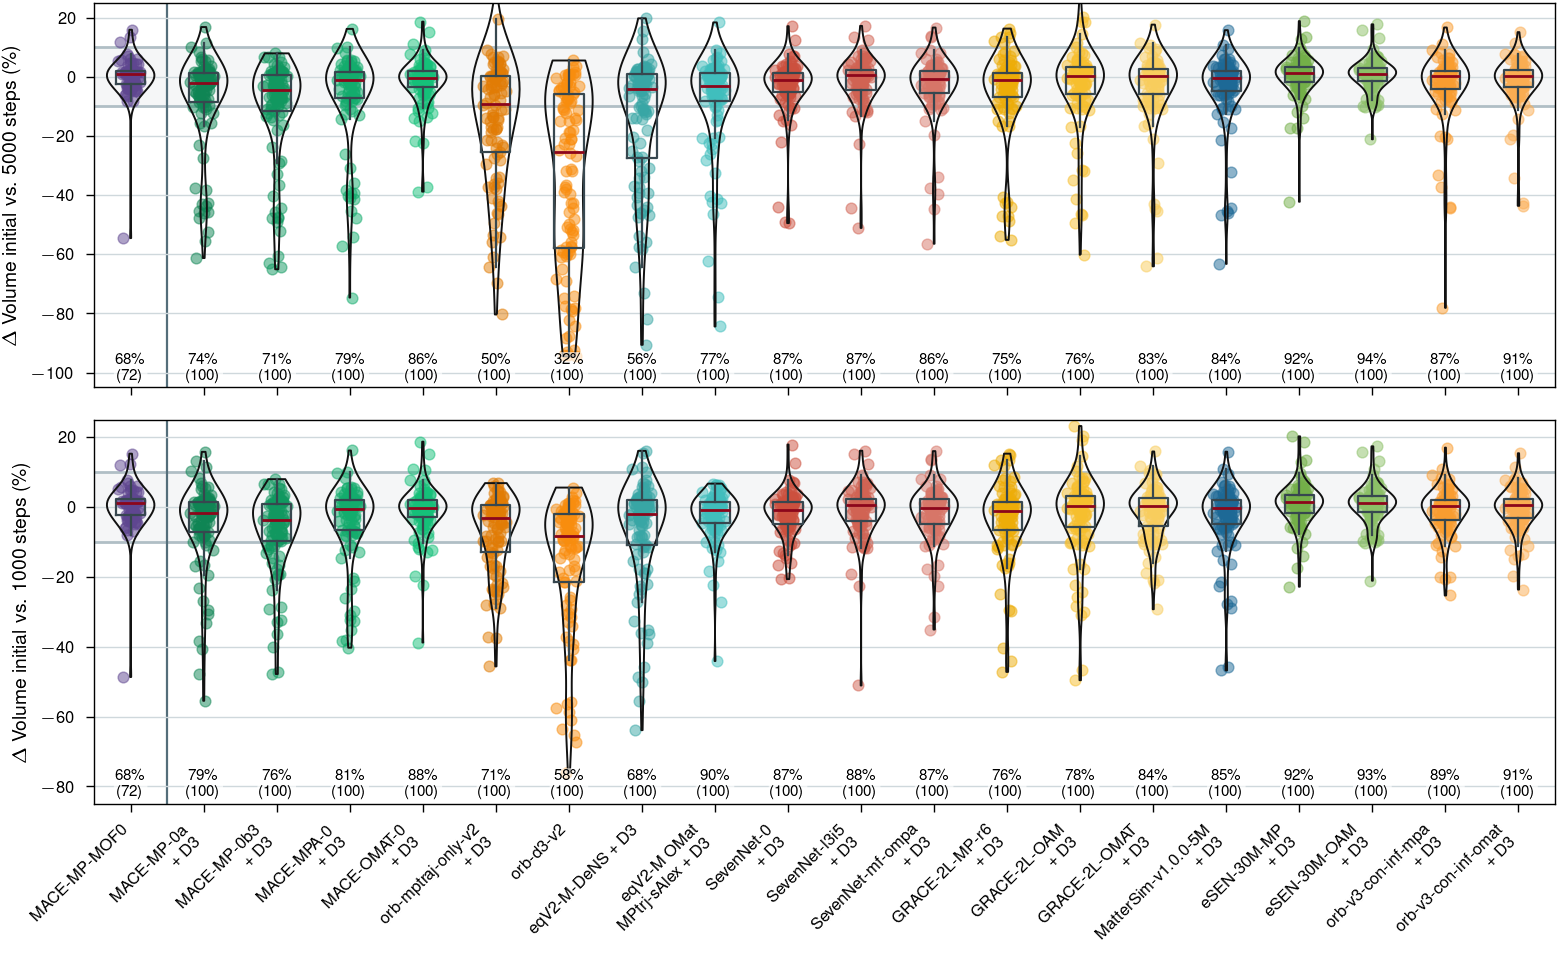

In [25]:
fig, axs = plt.subplots(2, 1, figsize=(8,5), sharex=True)

ax = axs[0]

if show_hlines:
    ax.grid(axis="y", color=GREY_LIGHT, lw=0.5, zorder=-100)

y_data = analysis_df
y_data = y_data[~y_data["vol_diff"].isna()]
failed_sum = y_data.groupby("calculator")["vol_diff"].agg(lambda x: (np.abs(x) > 10).sum())
y_data = y_data.groupby("calculator")["vol_diff"].apply(list).loc[all_calcs]

## VIOLIN PLOT
generate_violin_plot(y_data, ax, plot_density=False, scatter_kwargs={"s": 15, "rasterized": True}, colors=cmap_all)

ax.set_xticks(np.arange(len(all_calcs)), [calc_names[key] for key in all_calcs], rotation=45, ha="right")
ax.set_ylim([-105,25])
ax.set_xlim([-0.5, len(all_calcs) - 0.5])

rect = patches.Rectangle((-1, 10), len(all_calcs)+1, -20, linewidth=1, edgecolor="#B0BEC5", facecolor="#B0BEC5" + "20", zorder=-10)
ax.add_patch(rect) 

for x, calc in enumerate(all_calcs):
    total = len(y_data.loc[calc])
    succesful = total - failed_sum.loc[calc]
    ax.text(x, -104, f"{succesful}\\%\n({total})", horizontalalignment="center", verticalalignment="bottom", size=5.5, bbox=text_bbox)

# vertical bar to separate MACE-MP-MOF0
ax.axvline(0.5, color=GREY, zorder=0, linewidth = 0.8)

ax.set_ylabel("$\\Updelta$ Volume initial vs. 5000 steps (\\%)", size=7)

ax = axs[1]

if show_hlines:
    ax.grid(axis="y", color=GREY_LIGHT, lw=0.5, zorder=-100)

y_data = analysis_df
y_data = y_data[~y_data["vol_diff_1000"].isna()]
failed_sum = y_data.groupby("calculator")["vol_diff_1000"].agg(lambda x: (np.abs(x) > 10).sum())
y_data = y_data.groupby("calculator")["vol_diff_1000"].apply(list).loc[all_calcs]

## VIOLIN PLOT
generate_violin_plot(y_data, ax, plot_density=False, scatter_kwargs={"s": 15, "rasterized": True}, colors=cmap_all)

ax.set_xticks(np.arange(len(all_calcs)), [calc_names[key] for key in all_calcs], rotation=45, ha="right")
ax.set_ylim([-85,25])

rect = patches.Rectangle((-1, 10), len(all_calcs)+1, -20, linewidth=1, edgecolor="#B0BEC5", facecolor="#B0BEC5" + "20", zorder=-10)
ax.add_patch(rect) 

for x, calc in enumerate(all_calcs):
    total = len(y_data.loc[calc])
    succesful = total - failed_sum.loc[calc]
    ax.text(x, -84, f"{succesful}\\%\n({total})", horizontalalignment="center", verticalalignment="bottom", size=5.5, bbox=text_bbox)


# vertical bar to separate MACE-MP-MOF0
ax.axvline(0.5, color=GREY, zorder=0, linewidth = 0.8)

ax.set_ylabel("$\\Updelta$ Volume initial vs. 1000 steps (\\%)", size=7)

fig.tight_layout()
fig.set_dpi(200)
fig.show()

fig.savefig("figures/opt_volume_change.pdf")

# Stability

In [53]:
# Load the data
stability_file = (
    base_dir / "analysis" / "results" / "stability_results.parquet"
)
    
stability_df = pd.read_parquet(stability_file)

ambient_settings = "stability_prod_mtk.yaml"

In [39]:
ambient_df = stability_df[stability_df.index.get_level_values("settings").str.endswith(ambient_settings)]

In [40]:
# Filter out structures that collapse for MACE-MP-MOF0

sel = ambient_df[ambient_df.index.get_level_values("calculator") == "mace_prod_mof"]
rel_volume = sel["volume_rel"].apply(lambda x: x[-1])
unstable_structures = rel_volume[abs(1-rel_volume) > 0.1].index.get_level_values("structure")

In [41]:
unstable_structures

Index(['boydwoo_str_m3_o6_o6_nbo_sym_12', '13180N3'], dtype='object', name='structure')

In [42]:
last_step_relative_volume = []
last_step_rmsd_exp = []
for calc in all_calcs:
    df = ambient_df[
        (ambient_df.index.get_level_values("calculator") == calc)
        # & ~(ambient_df.index.get_level_values("structure").isin(unstable_structures))
    ]
    rel_volume = df["volume_rel"].apply(lambda x: x[-1])
    last_step_rmsd_exp.append(df["rmsd_exp"].apply(lambda x: x[-1]))
    last_step_relative_volume.append(rel_volume.values * 100 - 100)

In [43]:
failed_per_calculator = ambient_df[~ambient_df["volume_rel"].isna()].groupby("calculator")["volume_rel"].agg(lambda x: sum([np.abs(v[-1]-1) > 0.1 for v in x]))
successfully_computed_per_calculator = ambient_df[~ambient_df["volume_rel"].isna()].groupby("calculator")["volume_rel"].agg(len)

In [44]:
ambient_df.groupby("calculator")["volume_rel"].agg(len)

calculator
grace_prod                  96
grace_prod_oam              97
grace_prod_omat             97
mace_prod                  100
mace_prod_0a               100
mace_prod_b3               100
mace_prod_matpes           100
mace_prod_mof               72
mace_prod_omat             100
mattersim_prod             100
omat24_prod                 99
omat24_prod_esen           100
omat24_prod_esen_mp        100
omat24_prod_mp              99
orb_prod                    99
orb_prod_mp                100
orb_prod_v3                 99
orb_prod_v3_mp             100
sevennet_prod              100
sevennet_prod_l3i5         100
sevennet_prod_ompa         100
sevennet_prod_ompa_omat     99
Name: volume_rel, dtype: int64

In [45]:
coordination_diff = []
for calc in all_calcs:
    df = stability_df[stability_df.index.get_level_values("calculator") == calc]
    calc_coord_diff = df["opt_coordination"] - df["final_coordination"]
    coordination_diff.append(np.hstack(calc_coord_diff.values))

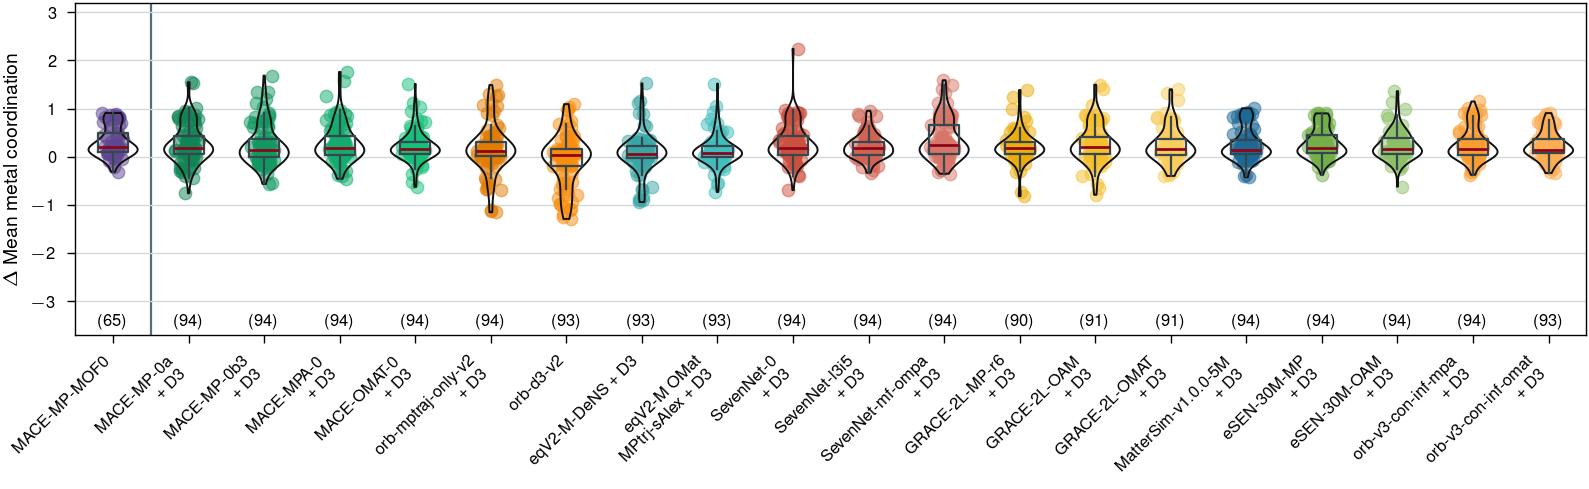

In [46]:
fig, ax = plt.subplots(figsize=(8,2.5))

generate_violin_plot(coordination_diff, ax=ax, plot_density=False, scatter_kwargs={"rasterized": True}, colors=cmap_all)
ax.set_xticks(np.arange(len(all_calcs)), [calc_names[key] for key in all_calcs], rotation=45, ha="right")

if show_hlines:
    ax.grid(axis="y", color=GREY_LIGHT, lw=0.5, zorder=-100)

# vertical bar to separate MACE-MP-MOF0
ax.axvline(0.5, color=GREY, zorder=0, linewidth = 0.8)

for x, calc in enumerate(all_calcs):
    i = all_calcs.index(calc)
    ax.text(x, -3.6, f"({len(coordination_diff[i])})", horizontalalignment="center", verticalalignment="bottom", size=6, bbox=dict(facecolor="#ffffffaa", edgecolor="None", boxstyle="round,pad=0.1"))

ax.set_ylabel("$\\Updelta$ Mean metal coordination", size=7)
ax.set_ylim([-3.7, 3.2])

fig.set_dpi(200)

fig.savefig("figures/stability_metal_coordination_all.pdf")

## Copper

In [54]:
copper_settings = "stability_prod_copper_mtk.yaml"
copper_coordination_df = stability_df[stability_df.index.get_level_values("settings").str.endswith(copper_settings)]
copper_coordination_df = copper_coordination_df.explode(["symbol", "initial_coordination", "final_coordination", "opt_coordination"])

In [56]:
copper_coordination_diff = []
for calc in all_calcs:
    df = copper_coordination_df[(copper_coordination_df.index.get_level_values("calculator") == calc) & (copper_coordination_df["symbol"] == "Cu")]
    calc_coord_diff = df["final_coordination"] - df["opt_coordination"]
    copper_coordination_diff.append(np.hstack(calc_coord_diff.values))

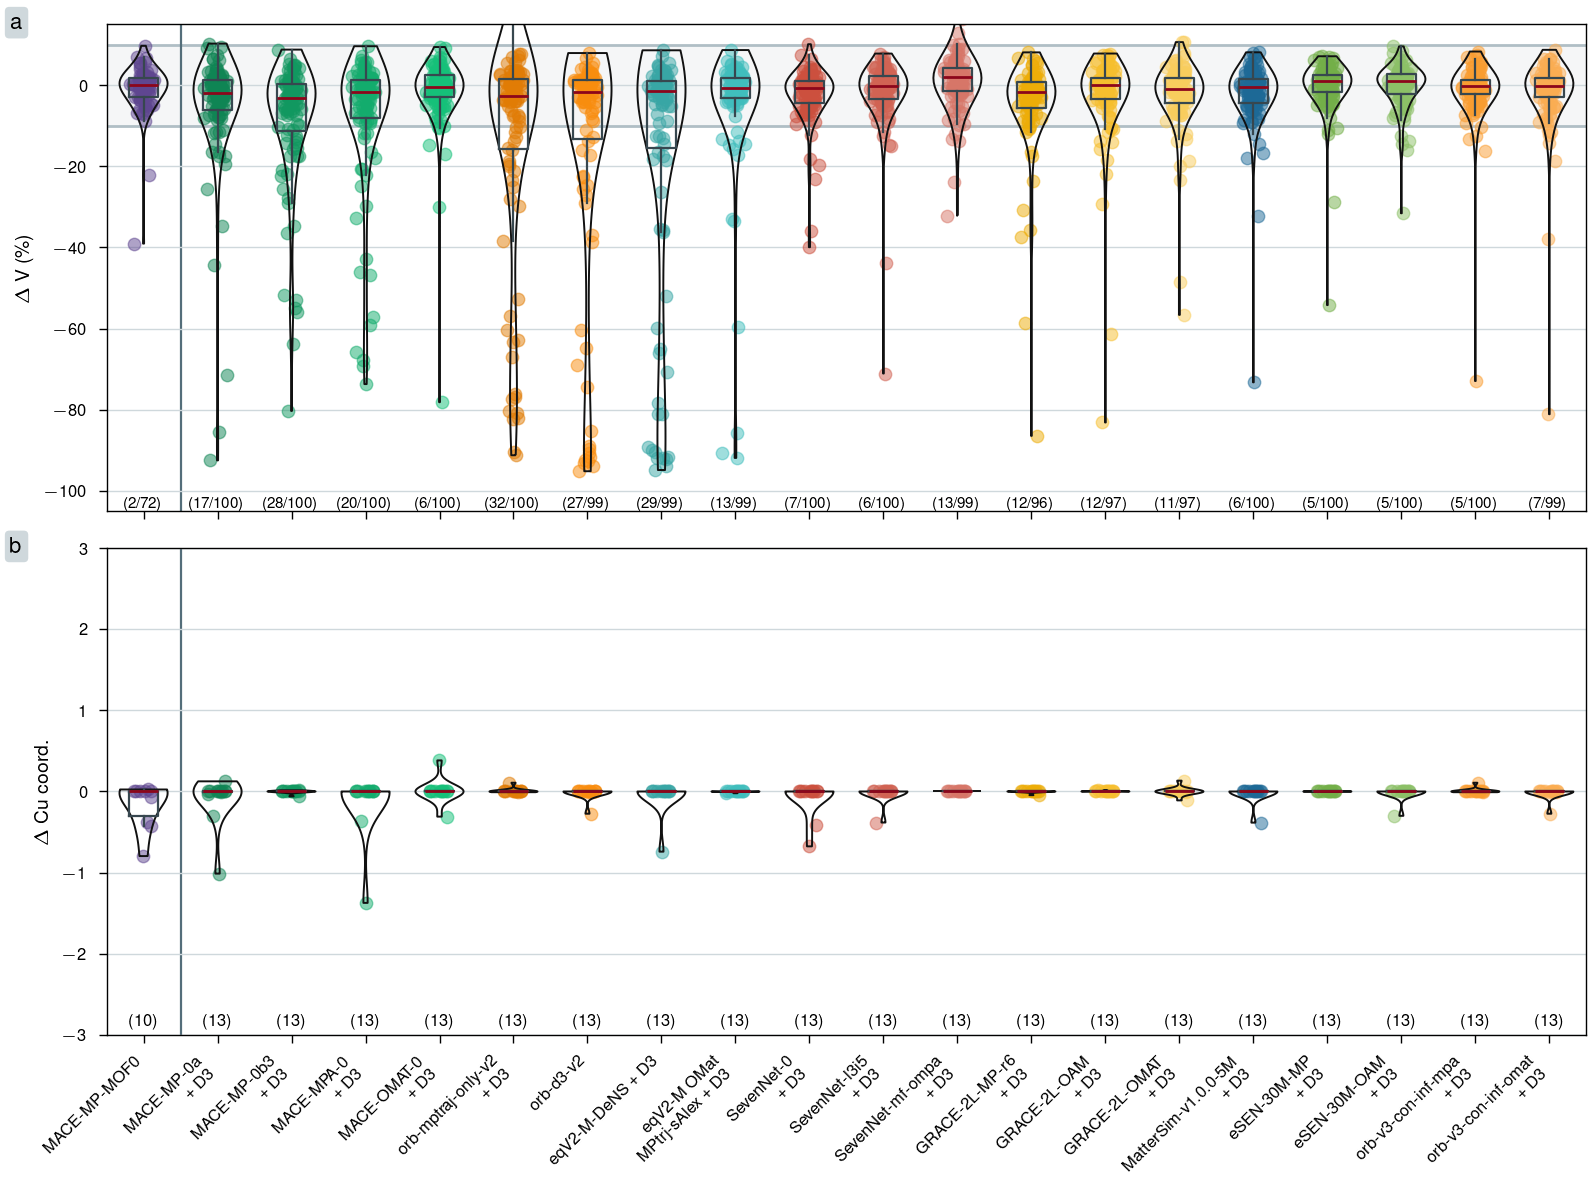

In [61]:
fig, axs = plt.subplots(2, figsize=(8,6), sharex=True)

ax = axs[0]

generate_violin_plot(last_step_relative_volume, ax, plot_density=False, scatter_kwargs={"rasterized": True}, colors=cmap_all)

ax.set_xticks(np.arange(len(all_calcs)), [calc_names[key] for key in all_calcs], rotation=45, ha="right")
ax.set_ylim([-105,15])
ax.set_ylabel("$\\Updelta$ V (\\%)", size=7)

rect = patches.Rectangle((-0.6, 10), len(all_calcs)+1, -20, linewidth=1, edgecolor="#B0BEC5", facecolor="#B0BEC5" + "20", zorder=-10)
ax.add_patch(rect)

if show_hlines:
    ax.grid(axis="y", color=GREY_LIGHT, lw=0.5, zorder=-100)
    
for x, calc in enumerate(all_calcs):
    i = all_calcs.index(calc)
    ax.text(x, -105, f"({failed_per_calculator.loc[calc]}/{len(last_step_relative_volume[i])})", horizontalalignment="center", verticalalignment="bottom", size=5.5)

# vertical bar to separate MACE-MP-MOF0
ax.axvline(0.5, color=GREY, zorder=0, linewidth = 0.8)

ax.annotate(
    "a",
    xy=(-0.08, 1.07), xycoords="axes fraction",
    xytext=(+1, -1), textcoords="offset fontsize",
    fontsize="8", verticalalignment="top",
    bbox=dict(facecolor=GREY_LIGHT, edgecolor="none", pad=3.0, boxstyle="round,pad=0.25,rounding_size=0.2")
)
ax.annotate(
    ".", color="#ffffff00",alpha=0,
    xy=(-0.085, 1.09), xycoords="axes fraction",
    xytext=(+1, -1), textcoords="offset fontsize",
    fontsize="8", verticalalignment="top",
)

ax = axs[1]

generate_violin_plot(copper_coordination_diff, ax=ax, plot_density=False, colors=cmap_all)
_ = ax.set_xticks(np.arange(len(all_calcs)), [calc_names[key] for key in all_calcs], rotation=45, ha="right")

ax.set_ylabel("$\\Updelta$ Cu coord.", size=7)

for x, calc in enumerate(all_calcs):
    i = all_calcs.index(calc)
    ax.text(x, -2.94, f"({len(copper_coordination_diff[i])})", horizontalalignment="center", verticalalignment="bottom", size=6, bbox=text_bbox)

if show_hlines:
    ax.grid(axis="y", color=GREY_LIGHT, lw=0.5, zorder=-100)

# vertical bar to separate MACE-MP-MOF0
ax.axvline(0.5, color=GREY, zorder=0, linewidth = 0.8)

ax.set_ylim([-3,3])
ax.set_xlim([-0.5, len(all_calcs)-0.5])

ax.annotate(
    "b",
    xy=(-0.08, 1.07), xycoords="axes fraction",
    xytext=(+1, -1), textcoords="offset fontsize",
    fontsize="8", verticalalignment="top",
    bbox=dict(facecolor=GREY_LIGHT, edgecolor="none", pad=3.0, boxstyle="round,pad=0.25,rounding_size=0.2")
)

fig.set_dpi(200)
fig.savefig("figures/stability_volume_copper_coordination_all.pdf")

## Increasing temp stability

In [62]:
temp_settings = "stability_prod_temp_mtk.yaml"

temp_stability_df = stability_df[stability_df.index.get_level_values("settings").str.endswith(temp_settings)]

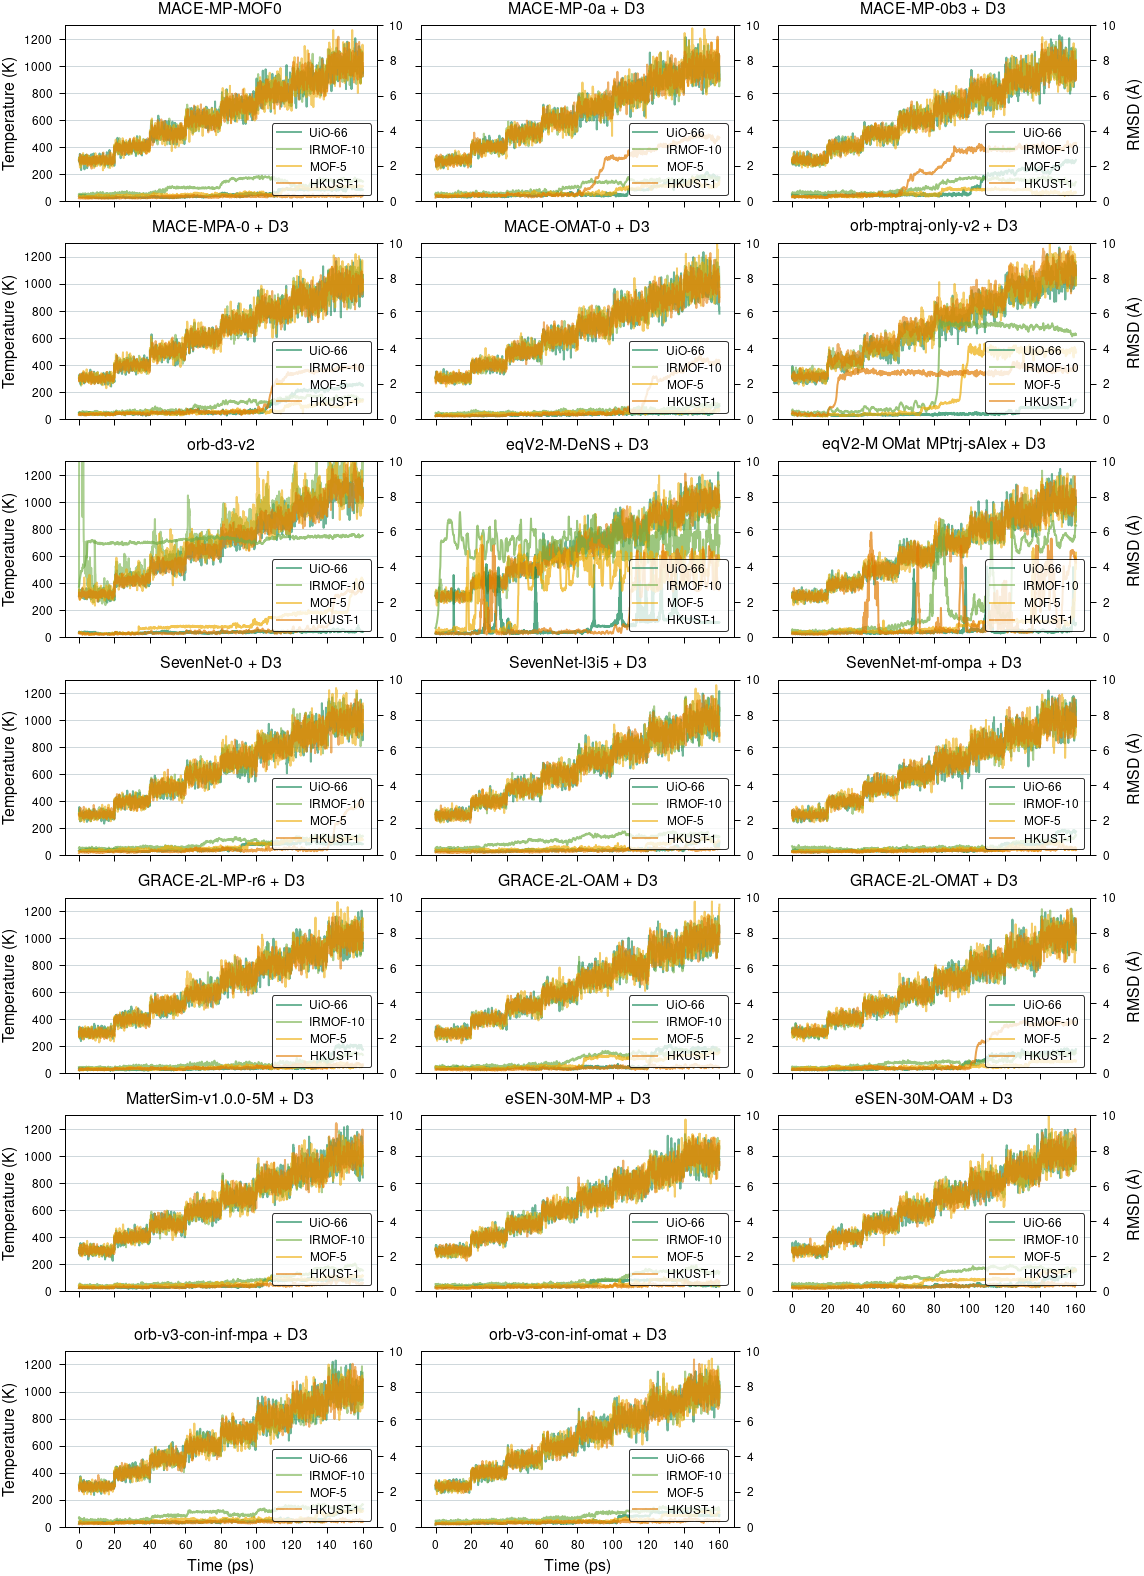

In [68]:
calcs = all_calcs

fig, ax = plt.subplots(np.ceil(len(calcs) / 3).astype(int), 3, figsize=(8, 0.5 * len(calcs)+1), sharex=True, sharey=True, constrained_layout=True)
ax = ax.ravel()

structures = ['UiO-66_primitive', 'IRMOF-10_primitive', 'MOF-5_primitive', 'HKUST-1_primitive']

for i, calc in enumerate(calcs):
    
    y_axis = ax[i].twinx()
    
    for j, structure in enumerate(structures):
        try:
            sel = temp_stability_df[(temp_stability_df.index.get_level_values("calculator") == calc) & (temp_stability_df.index.get_level_values("structure") == structure)].iloc[0]
    
            idx = sel.stage > 1
            step = sel.step[idx] + (sel.stage[idx] - 2) * 20000
            temp = sel.temperature[idx]
            rmsd = sel.rmsd_exp[idx]
            ax[i].plot(step, temp, label = structure.replace("_primitive", ""), c=palette[j+3], alpha=0.6, rasterized=True)
            y_axis.plot(step, rmsd, c=palette[j+3], alpha=0.7, rasterized=True)
            
        except:
            pass

        ax[i].set_title(calc_names[calc].replace("\n", " "))
        ax[i].legend()

        ax[i].set_ylim([0,1300])
        if i in [20,19,18]:
            ax[i].set_xlabel("Time (ps)")
        if i % 3 == 0:
            ax[i].set_ylabel("Temperature (K)")
        if i % 3 == 2:
            y_axis.set_ylabel("RMSD (\\AA)")
        ax[i].set_xticks(np.arange(0, 160001, 20000), np.arange(0, 170, 20))
        y_axis.set_ylim([0,10])
    
        HLINES = np.arange(0, 1400, 200)
        if show_hlines:
            for h in HLINES:
                ax[i].axhline(h, color=GREY_LIGHT, lw=0.4, zorder=-10)
    
            #for h in HLINES + 100:
            #    ax[i].axhline(h, color=GREY_LIGHT, lw=0.2, zorder=-10)


    legend = ax[i].get_legend()
    if legend is not None:
        legend.remove()
        y_axis.add_artist(legend)

for i in range(len(calcs), np.ceil(len(calcs) / 3).astype(int) * 3):
    ax[i].set_axis_off()
    ax[i - 3].xaxis.set_tick_params(which="both", labelbottom=True)

# fig.tight_layout()
fig.savefig("figures/stability_temp.pdf")

# Bulk modulus

In [69]:
bulk_modulus_file = base_dir / "analysis" / "results" / "bulk_modulus_results.parquet"
bulk_modulus_results = pd.read_parquet(bulk_modulus_file)

selected_settings = "bulk_modulus.yaml"

In [70]:
bulk_modulus_df = bulk_modulus_results[(bulk_modulus_results.index.get_level_values("settings").str.endswith(selected_settings))]

In [71]:
bulk_modulus_diff = []
bulk_modulus_rmse = []
bulk_modulus_mae = []
bulk_modulus_se = []

all_calcs_bm = all_calcs
exclude_failed = True

for calc in all_calcs_bm:
    df = bulk_modulus_df[bulk_modulus_df.index.get_level_values("calculator") == calc]
    if len(df) == 0:
        bulk_modulus_diff.append(None)
        bulk_modulus_rmse.append(None)
        continue
    #print(f"{calc} failed {df[df["B"].isna()].index.get_level_values("structure").values}")
    if len(df[(~df["dft_B"].isna()) & (df["B"].isna())]) > 0:
        print(calc, "failed", df[(~df["dft_B"].isna()) & (df["B"].isna())].index.get_level_values("structure").values)
    df = df[(~df["dft_B"].isna()) & (~df["B"].isna())]
    if exclude_failed:
        opt_volumes = df["volumes"].apply(lambda x: x[5])
        failed = abs((opt_volumes - df["v0"]) / opt_volumes) > 0.01
        df = df[~failed]
    print(calc, "N:", len(df))
    values = (df["B"] - df["dft_B"]).values
    values = values[~np.isnan(values)]
    bulk_modulus_diff.append(values)
    bulk_modulus_rmse.append(root_mean_squared_error(df["dft_B"], df["B"]))
    bulk_modulus_mae.append(np.mean(np.abs(df["dft_B"] - df["B"])))
    bulk_modulus_se.append(np.std(np.abs(df["dft_B"] - df["B"]))/len(df["dft_B"]))

np.mean(bulk_modulus_rmse[:-2]), np.mean(bulk_modulus_mae[:-2])

mace_prod_mof failed ['RIGDOC_full' 'LEZTIW_full' 'TAJXIO01_full' 'TOHQAJ_full' '16050N2'
 '20561N3' 'KINFEU_full' 'IKEVEC_full' 'MAQXIN01_full' '20560N3' '12022N2'
 'ZEDWAJ_full' 'core_GUJGAU_freeONLY' 'OQOCOP_full' 'AXIPEE01_full'
 'NUVCUD_full' 'PEZCII_full' 'NIGGEQ_full' 'PEYHAF_full' 'IXOFIL_full'
 'NAVJAW_full_primitive' 'LUMQIU_full' 'YEGCUJ_full' 'REQDEX_full'
 'ZOHQOF_full' 'CoMOF74' 'CALOXM13_full' 'RUYQIN02_full']
mace_prod_mof N: 70
mace_prod_0a N: 95
mace_prod_b3 N: 92
mace_prod N: 90
mace_prod_omat N: 98
orb_prod_mp N: 33
orb_prod failed ['gmof_AlO6-ADC_A_No11' 'tobacco_srsb_sym_3_on_1_sym_3_mc_0_L_12' 'AlPMOF'
 'gmof_AlO6-ADC_A_No25' 'IKEVEC_full' 'GUPCEA_full_primitive' 'MgMOF74'
 'IXOFIL_full' 'QULMIU_full' 'CoMOF74' 'CALOXM13_full']
orb_prod N: 14
omat24_prod_mp failed ['QUSJEW_full_primitive' 'CoMOF74']
omat24_prod_mp N: 25
omat24_prod failed ['TOHQAJ_full' 'XUMFOC_full' 'MAQXIN01_full' 'WEZWOO_full'
 'core_GUJGAU_freeONLY' 'NAVJAW_full_primitive' 'zif-8']
omat24_pro

(np.float64(18.400549563548516), np.float64(8.959207346722735))

In [72]:
df = bulk_modulus_df[bulk_modulus_df.index.get_level_values("calculator") == "mace_prod_mof"]

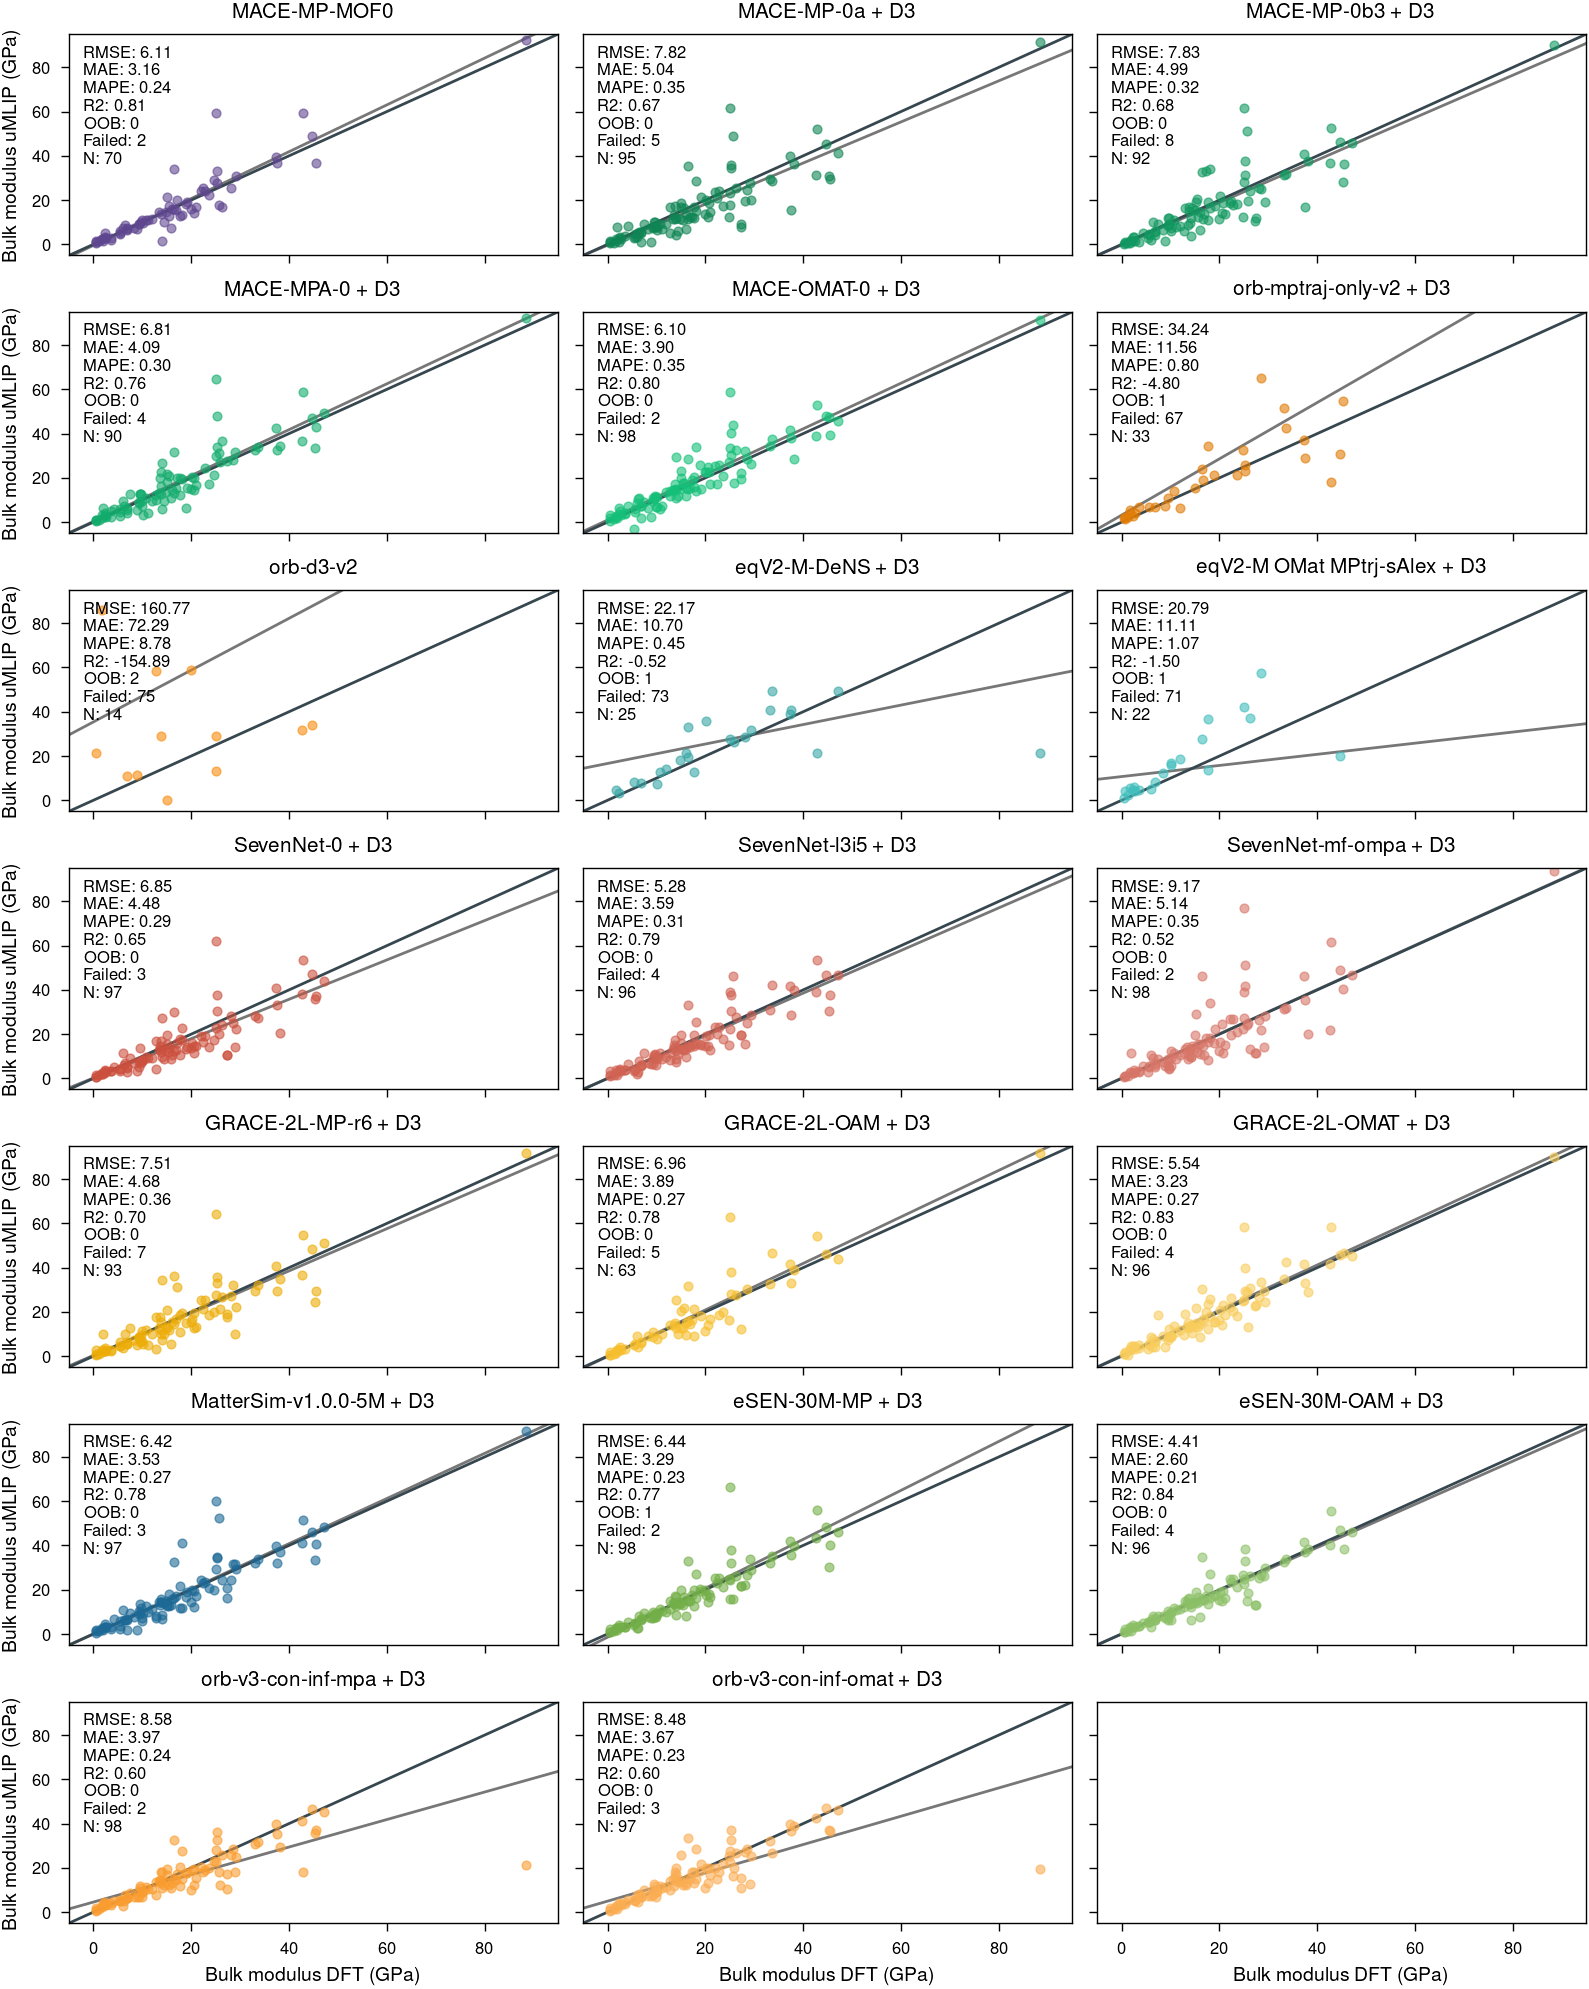

In [73]:
ncols = 3
figheight, figwidth = 10, 8

calculators = bulk_modulus_df.index.get_level_values("calculator").unique()
calculators = all_calcs_bm

exclude_failed = True

b_min, b_max = -5, 95

nrows = int(np.ceil(len(calculators) / ncols))

fig, ax = plt.subplots(
    nrows,
    ncols,
    figsize=(figwidth, figheight),
    sharey=True,
    sharex=True,
    constrained_layout=True
)

for i, calc in enumerate(calculators):

    y = i // ncols
    x = i % ncols

    df = bulk_modulus_df[bulk_modulus_df.index.get_level_values("calculator") == calc]
    df = df[(~df["dft_B"].isna()) & (~df["B"].isna())]
    num_failed = 0
    if exclude_failed:
        opt_volumes = df["volumes"].apply(lambda x: x[5])
        failed = abs((opt_volumes - df["v0"]) / opt_volumes) > 0.01
        num_failed = sum(failed)
        df = df[~failed]

    rmse = root_mean_squared_error(df["dft_B"], df["B"])
    mae = np.mean(np.abs(df["dft_B"] - df["B"]))
    mape = mean_absolute_percentage_error(df["dft_B"], df["B"])
    r2 = r2_score(df["dft_B"], df["B"])
    ybounds = b_min, b_max
    xbounds = b_min, b_max
    oob = np.sum((df["B"] > ybounds[1]) | (df["B"] < ybounds[0]) | (df["dft_B"] < xbounds[0]) | (df["dft_B"] > xbounds[1]))
    m, b = np.polyfit(df["dft_B"].values, df["B"].values, 1)

    poly_x = np.linspace(b_min, b_max, 2)
    poly_y = poly_x * m + b
    ax[y][x].plot(poly_x, poly_y, c="#777", zorder=-10)
    
    ax[y][x].scatter(df["dft_B"], df["B"], s=10, c=[cmap_all[all_calcs.index(calc)]], alpha=0.6)
    ax[y][x].plot([b_min, b_max], [b_min, b_max], c=GREY_DARK, zorder=-10)
    ax[y][x].set_xlim([b_min, b_max])
    ax[y][x].set_ylim(ybounds)
    ax[y][x].set_title(calc_names[calc].replace("\n", " "), size=7.5)
    ax[y][x].text(0.03, 0.95, f"RMSE: {rmse:.2f}\nMAE: {mae:.2f}\nMAPE: {mape:.2f}\nR2: {r2:.2f}\nOOB: {oob}\nFailed: {num_failed}\nN: {len(df)}", horizontalalignment="left", verticalalignment="top", transform = ax[y][x].transAxes, size=6)
    # ax[y][x].grid(alpha=0.5)

for y in range(nrows):
    ax[y][0].set_ylabel("Bulk modulus uMLIP (GPa)", size=7)
for x in range(ncols):
    ax[nrows-1][x].set_xlabel("Bulk modulus DFT (GPa)", size=7)


# fig.tight_layout()
fig.set_dpi(200)
fig.savefig("figures/bulk_modulus_parity_all_no_failed.pdf")

### ESMOFs:

In [74]:
esmofs = ["MOF-5_primitive", "IRMOF-10_primitive", "UiO-66_primitive", "HKUST-1_primitive"]

df = bulk_modulus_df[bulk_modulus_df.index.get_level_values("structure").isin(esmofs)]

for calc in all_calcs:
    uio = df[(df.index.get_level_values("calculator") == calc) & (df.index.get_level_values("structure") == esmofs[2])].iloc[0]["B"]
    mof5 = df[(df.index.get_level_values("calculator") == calc) & (df.index.get_level_values("structure") == esmofs[0])].iloc[0]["B"]
    irmof10 = df[(df.index.get_level_values("calculator") == calc) & (df.index.get_level_values("structure") == esmofs[1])].iloc[0]["B"]
    hkust = df[(df.index.get_level_values("calculator") == calc) & (df.index.get_level_values("structure") == esmofs[3])].iloc[0]["B"]

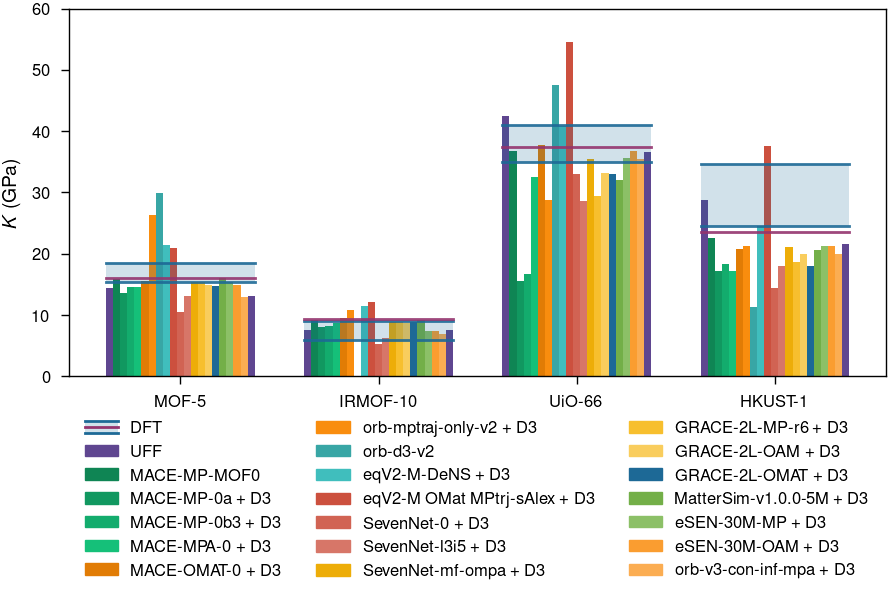

In [75]:
fig, ax = plt.subplots(figsize=(4.5,3))

df = bulk_modulus_df[bulk_modulus_df.index.get_level_values("structure").isin(esmofs)]
width = 1.5 / (len(all_calcs)+1)
x = np.linspace(0,width * len(all_calcs),len(all_calcs)+1)

mof5_dft = np.asarray([
    16.3, # 10.1103/PhysRevB.76.184106 (DFT)
    15.34, # 10.1002/pssb.201100634 (DFTB)
    18.5, # 10.1063/1.2337287 (DFT/VASP)
    17.02, # 10.1103/PhysRevB.73.094111 (DFT)
    18.20, # 10.1103/PhysRevB.74.180301 (DFT)
    15.95, # 10.1038/s41524-025-01611-8 (DFT)
])
irmof10_dft = np.asarray([
    6.0, # 10.1021/jp072085x (DFT)
    9.09, # 10.1039/C1RA00187F (DFT)
    8.6, # 10.1038/s41524-025-01611-8 (DFT)
])
uio_dft = np.asarray([
    41.01, # 10.1021/jz4002345 (DFT)
    35.00, # 10.1038/s41524-025-01611-8 (DFT)
])
hkust_dft = np.asarray([
    24.53, # 10.1021/jz4002345 (DFT)
    34.66, # 10.1002/pssb.201100634 (DFT)
])
# our DFT, UFF 2017
mof5s = [16.062275, 14.5]
irmof10s = [9.399284, 7.6]
uios = [37.499708, 42.4]
hkusts = [23.581468, 28.7]
for i, calc in enumerate(all_calcs):
    calc_filter = df.index.get_level_values("calculator") == calc
    uio = df[calc_filter & (df.index.get_level_values("structure") == esmofs[2])].iloc[0]["B"]
    mof5 = df[calc_filter & (df.index.get_level_values("structure") == esmofs[0])].iloc[0]["B"]
    irmof10 = df[calc_filter & (df.index.get_level_values("structure") == esmofs[1])].iloc[0]["B"]
    hkust = df[calc_filter & (df.index.get_level_values("structure") == esmofs[3])].iloc[0]["B"]
    uios.append(max(uio, 0))
    hkusts.append(max(hkust, 0))
    mof5s.append(max(mof5, 0))
    irmof10s.append(max(irmof10, 0))
    
# colors = [palette[2], palette[3]] + [palette[5][:-2]+f"{a}{a}" for a in "579bdf"][::-1]
colors = cmap_all
ax.bar(x, [mof5s[1]] + [mof5s[2:][all_calcs.index(calc)] for calc in all_calcs], width, label="MOF-5", color = colors)
ax.bar(x + 2, [irmof10s[1]] + [irmof10s[2:][all_calcs.index(calc)] for calc in all_calcs], width, label="IRMOF-10", color = colors)
ax.bar(x + 4, [uios[1]] + [uios[2:][all_calcs.index(calc)] for calc in all_calcs], width, label="UiO-66", color = colors)
ax.bar(x + 6, [hkusts[1]] + [hkusts[2:][all_calcs.index(calc)] for calc in all_calcs], width, label="HKUST-1", color = colors)

# DFT bars
min_offset = -width/2
max_offset = width * (len(all_calcs) + 0.5)
ax.plot([min_offset, max_offset], [mof5_dft.max(), mof5_dft.max()], c=palette[1], alpha=0.9)
ax.plot([min_offset, max_offset], [mof5_dft.min(), mof5_dft.min()], c=palette[1], alpha=0.9)
ax.fill_between([min_offset, max_offset], [mof5_dft.min(), mof5_dft.min()], [mof5_dft.max(), mof5_dft.max()], fc=palette[1], alpha=0.2)
ax.plot([min_offset, max_offset], [mof5s[0], mof5s[0]], c=palette[8], alpha=0.9)

ax.plot([2+min_offset, 2+max_offset], [irmof10_dft.max(), irmof10_dft.max()], c=palette[1], alpha=0.9)
ax.plot([2+min_offset, 2+max_offset], [irmof10_dft.min(), irmof10_dft.min()], c=palette[1], alpha=0.9)
ax.fill_between([2+min_offset, 2+max_offset], [irmof10_dft.min(), irmof10_dft.min()], [irmof10_dft.max(), irmof10_dft.max()], fc=palette[1], alpha=0.2)
ax.plot([2+min_offset, 2+max_offset], [irmof10s[0], irmof10s[0]], c=palette[8], alpha=0.9)

ax.plot([4+min_offset, 4+max_offset], [uio_dft.max(), uio_dft.max()], c=palette[1], alpha=0.9)
ax.plot([4+min_offset, 4+max_offset], [uio_dft.min(), uio_dft.min()], c=palette[1], alpha=0.9)
ax.fill_between([4+min_offset, 4+max_offset], [uio_dft.min(), uio_dft.min()], [uio_dft.max(), uio_dft.max()], fc=palette[1], alpha=0.2)
ax.plot([4+min_offset, 4+max_offset], [uios[0], uios[0]], c=palette[8], alpha=0.9)

ax.plot([6+min_offset, 6+max_offset], [hkust_dft.max(), hkust_dft.max()], c=palette[1], alpha=0.9)
ax.plot([6+min_offset, 6+max_offset], [hkust_dft.min(), hkust_dft.min()], c=palette[1], alpha=0.9)
polycollection = ax.fill_between([6+min_offset, 6+max_offset], [hkust_dft.min(), hkust_dft.min()], [hkust_dft.max(), hkust_dft.max()], fc=palette[1], alpha=0.2)
ax.plot([6+min_offset, 6+max_offset], [hkusts[0], hkusts[0]], c=palette[8], alpha=0.9)


# custom legend handler
class HandlerFilledBetween(matplotlib.legend_handler.HandlerPolyCollection):
    def create_artists(self, legend, orig_handle, xdescent, ydescent, width, height, fontsize, trans):
        p = super().create_artists(legend, orig_handle, xdescent, ydescent, width, height, fontsize, trans)[0]
        x0, y0 = p.get_x(), p.get_y()
        x1 = x0 + p.get_width()
        y1 = y0 + p.get_height()
        line_upper = mlines.Line2D([x0, x1], [y1, y1], color=palette[1])
        line_lower = mlines.Line2D([x0, x1], [y0, y0], color=palette[1])
        line_middle = mlines.Line2D([x0, x1], [(y0+y1)/2, (y0+y1)/2], color=palette[8])
        return [p, line_upper, line_lower, line_middle]


lines = [polycollection] + [mpatches.Patch(color=c) for c in colors]
labels = ["DFT", "UFF"] + [calc_names[key].replace("\n", " ") for key in all_calcs]

ax.legend(lines,
          labels,
          loc="upper center",
          bbox_to_anchor=(0.5, -0.08),
          ncol=3,
          handler_map={matplotlib.collections.PolyCollection: HandlerFilledBetween()},
          frameon=False
         )

ax.set_xticks(0.75+np.arange(0,7,2) + min_offset, [v.replace("_primitive", "") for v in esmofs])
ax.set_ylabel("$K$ (GPa)", size=7)
ax.set_ylim([0,60])

fig.set_dpi(200)
fig.savefig("figures/bulk_modulus_esmof.pdf", dpi=300)

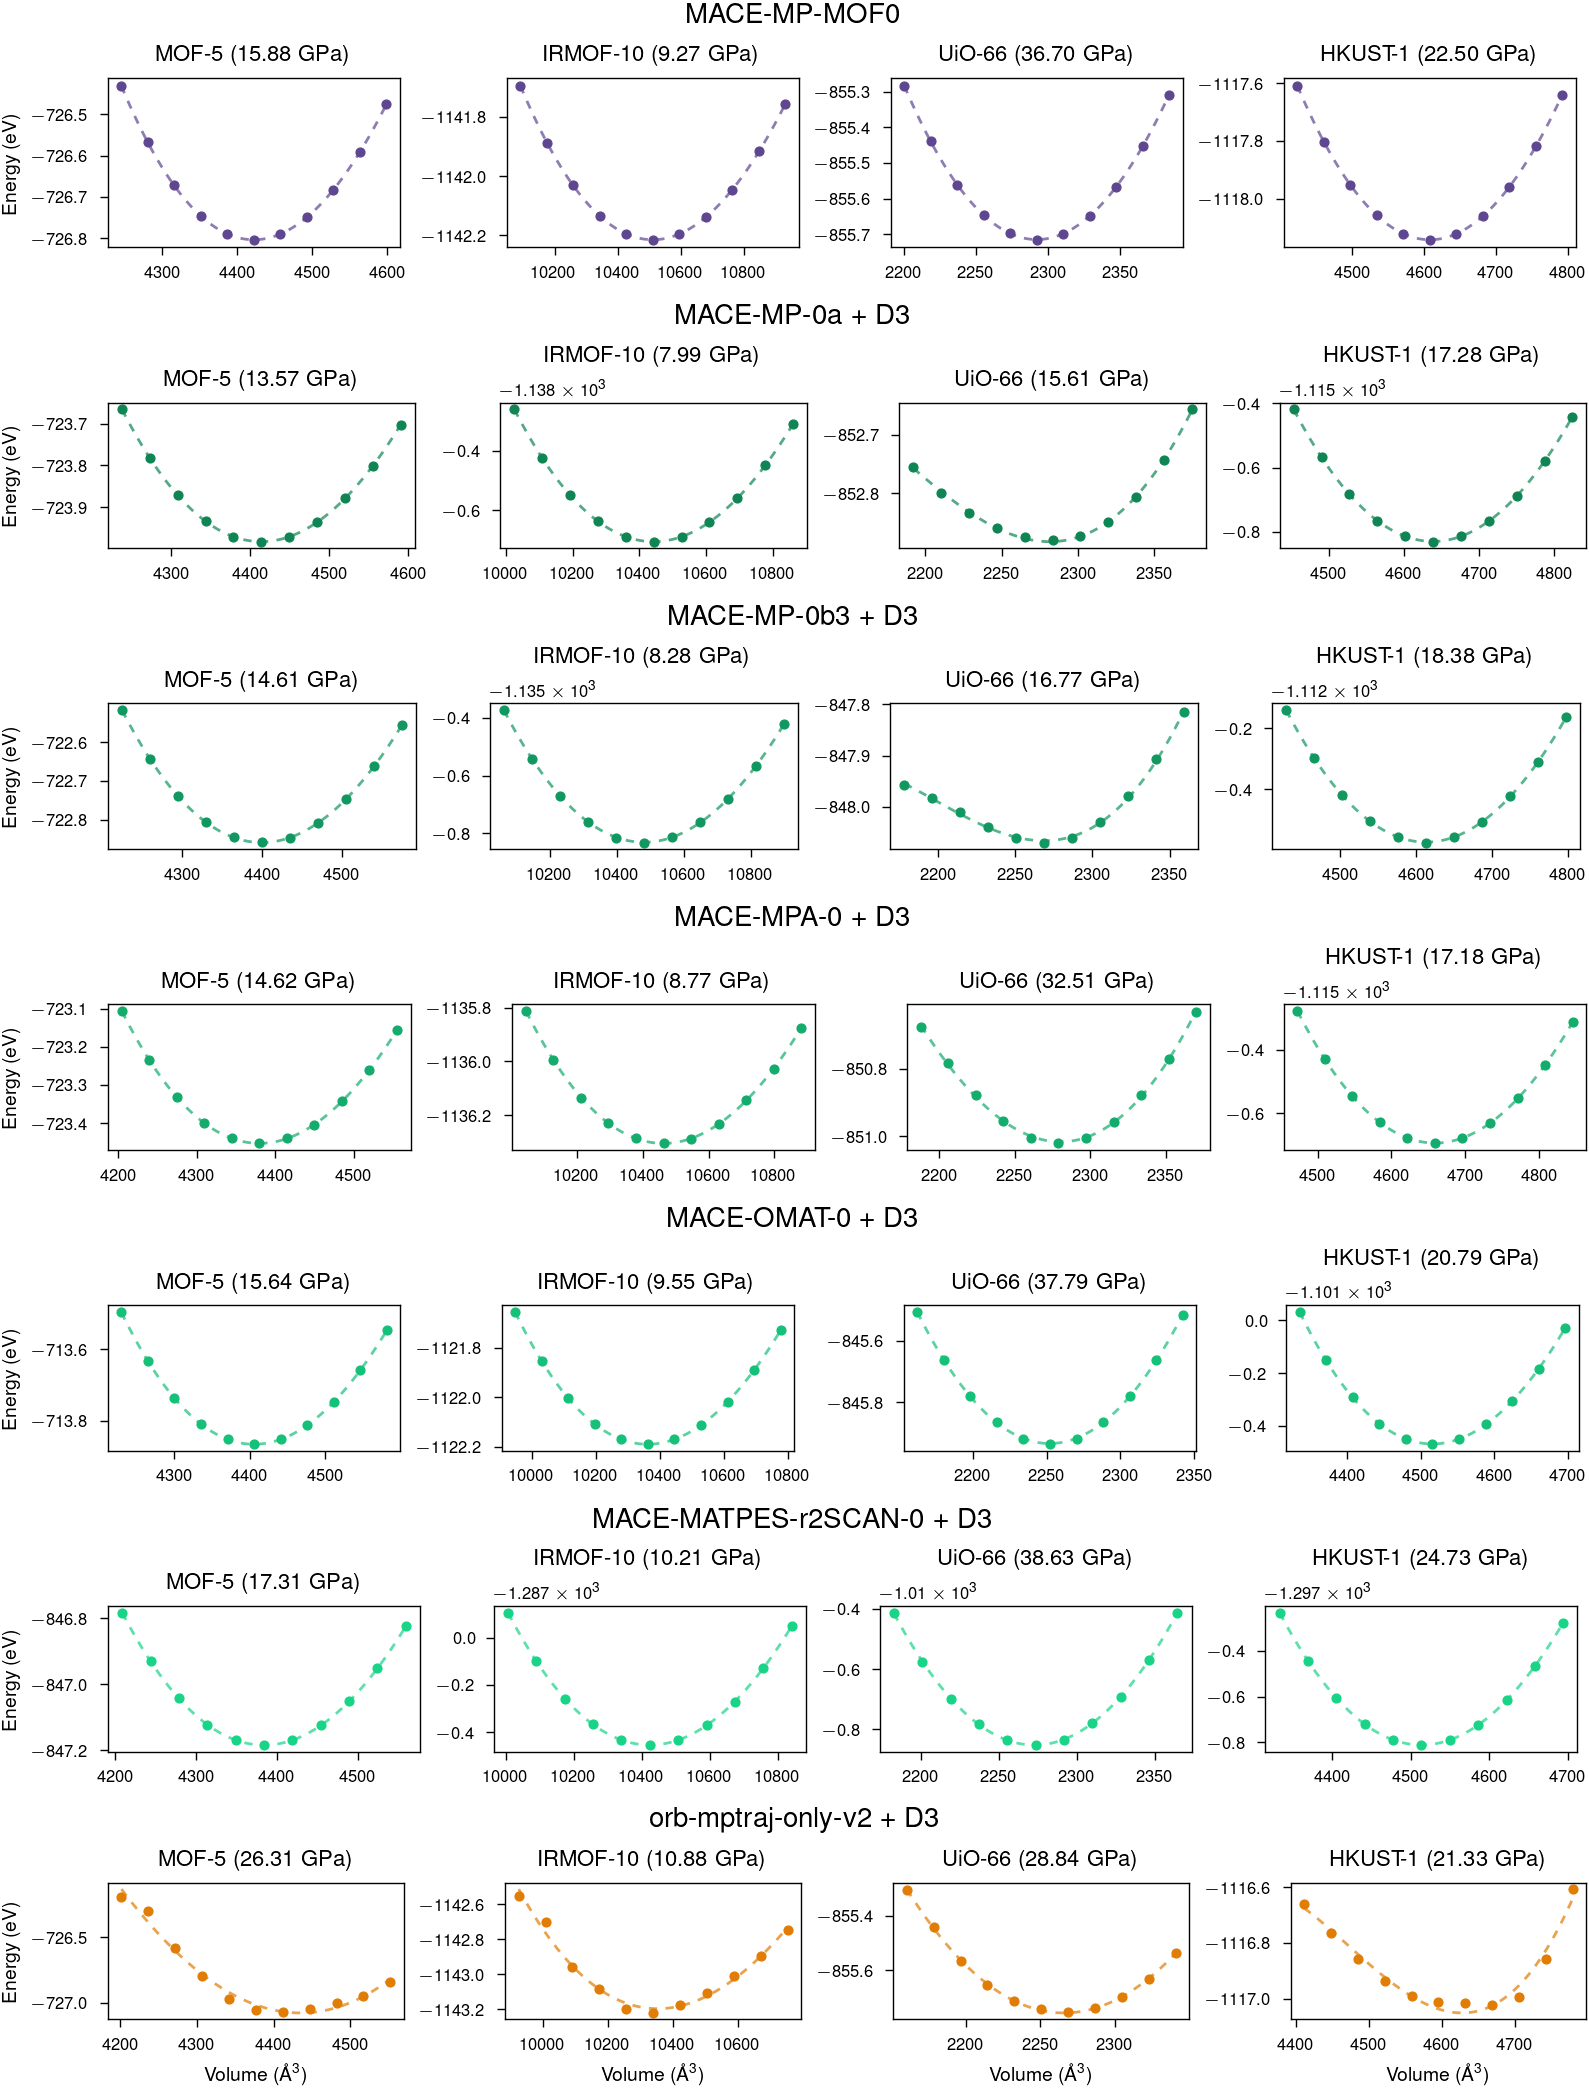

In [149]:
index = 0
rows_per_fig = 7
bm_calcs = all_calcs[index * rows_per_fig:(index + 1) * rows_per_fig]

fig = plt.figure(constrained_layout=True, figsize=(8,1.5 * len(bm_calcs)))

subfigs = fig.subfigures(nrows=len(bm_calcs), ncols=1)
if not isinstance(subfigs, np.ndarray):
    subfigs = [subfigs]
for i, subfig in enumerate(subfigs):
    calc = bm_calcs[i]
    t = calc_names[calc].replace('\n', ' ')
    subfig.suptitle(f"{t}", size=10)

    # create 1x3 subplots per subfig
    axs = subfig.subplots(nrows=1, ncols=4)
    for j, ax in enumerate(axs):
        structure = esmofs[j]
        values = df[(df.index.get_level_values("calculator") == calc) & (df.index.get_level_values("structure") == structure)].iloc[0]
        label = ""
        c = [cmap_all[all_calcs.index(calc)]]
        try:
            eos = EquationOfState(
                values["volumes"],
                values["energies"],
                eos="birchmurnaghan",
            )
            v0, e0, B = eos.fit(warn=False)
            plot_data = eos.getplotdata()
            ax.plot(plot_data[-4], plot_data[-3], c=c[0], ls=(0, (3,3)), alpha=0.7)
            label = f"{B / units.kJ * 1.0e24:.2f}"
            pass
        except:
            pass
        ax.scatter(values["volumes"], values["energies"], s=10, c=c)
        if label != "":
            ax.set_title(f"{structure.replace('_primitive', '')} ({label} GPa)")
        else:
            ax.set_title(f"{structure.replace('_primitive', '')} (not converged)")

        if i == len(subfigs) - 1:
            ax.set_xlabel("Volume (\\AA$^3$)", size=7)

        if j == 0:
            ax.set_ylabel("Energy (eV)", size=7)

fig.set_dpi(200)
fig.savefig(f"figures/bulk_modulus_eos_all_{index}.pdf")

# Heat capacity

In [76]:
heat_capacity_file = base_dir / "analysis" / "results" / "heat_capacity_results.parquet"
heat_capacity_results = pd.read_parquet(heat_capacity_file)
selected_settings = "heat_capacity.yaml"

In [77]:
heat_capacity_df = heat_capacity_results[(heat_capacity_results.index.get_level_values("settings").str.endswith(selected_settings))]

In [78]:
temp_300_index = np.where(heat_capacity_df.iloc[0]["temperatures"] == 300)[0][0]
heat_capacity_df.loc[:, "cv_300"] = heat_capacity_df["heat_capacity_g"].apply(lambda x: x[temp_300_index])

In [79]:
heat_capacity_diff = []
heat_capacity_rmse = []
heat_capacity_mae = []
for calc in all_calcs:
    df = heat_capacity_df[heat_capacity_df.index.get_level_values("calculator") == calc]
    df = df[(~df["cv_300"].isna()) & (~df["dft_cv"].isna())]
    heat_capacity_diff.append((df["cv_300"] - df["dft_cv"]).values)
    if len(df["cv_300"])>0:
        heat_capacity_rmse.append(root_mean_squared_error(df["cv_300"], df["dft_cv"]))
        heat_capacity_mae.append(np.mean(np.abs(df["cv_300"] - df["dft_cv"])))
    else:
        heat_capacity_rmse.append(np.inf)
        heat_capacity_mae.append(np.inf)

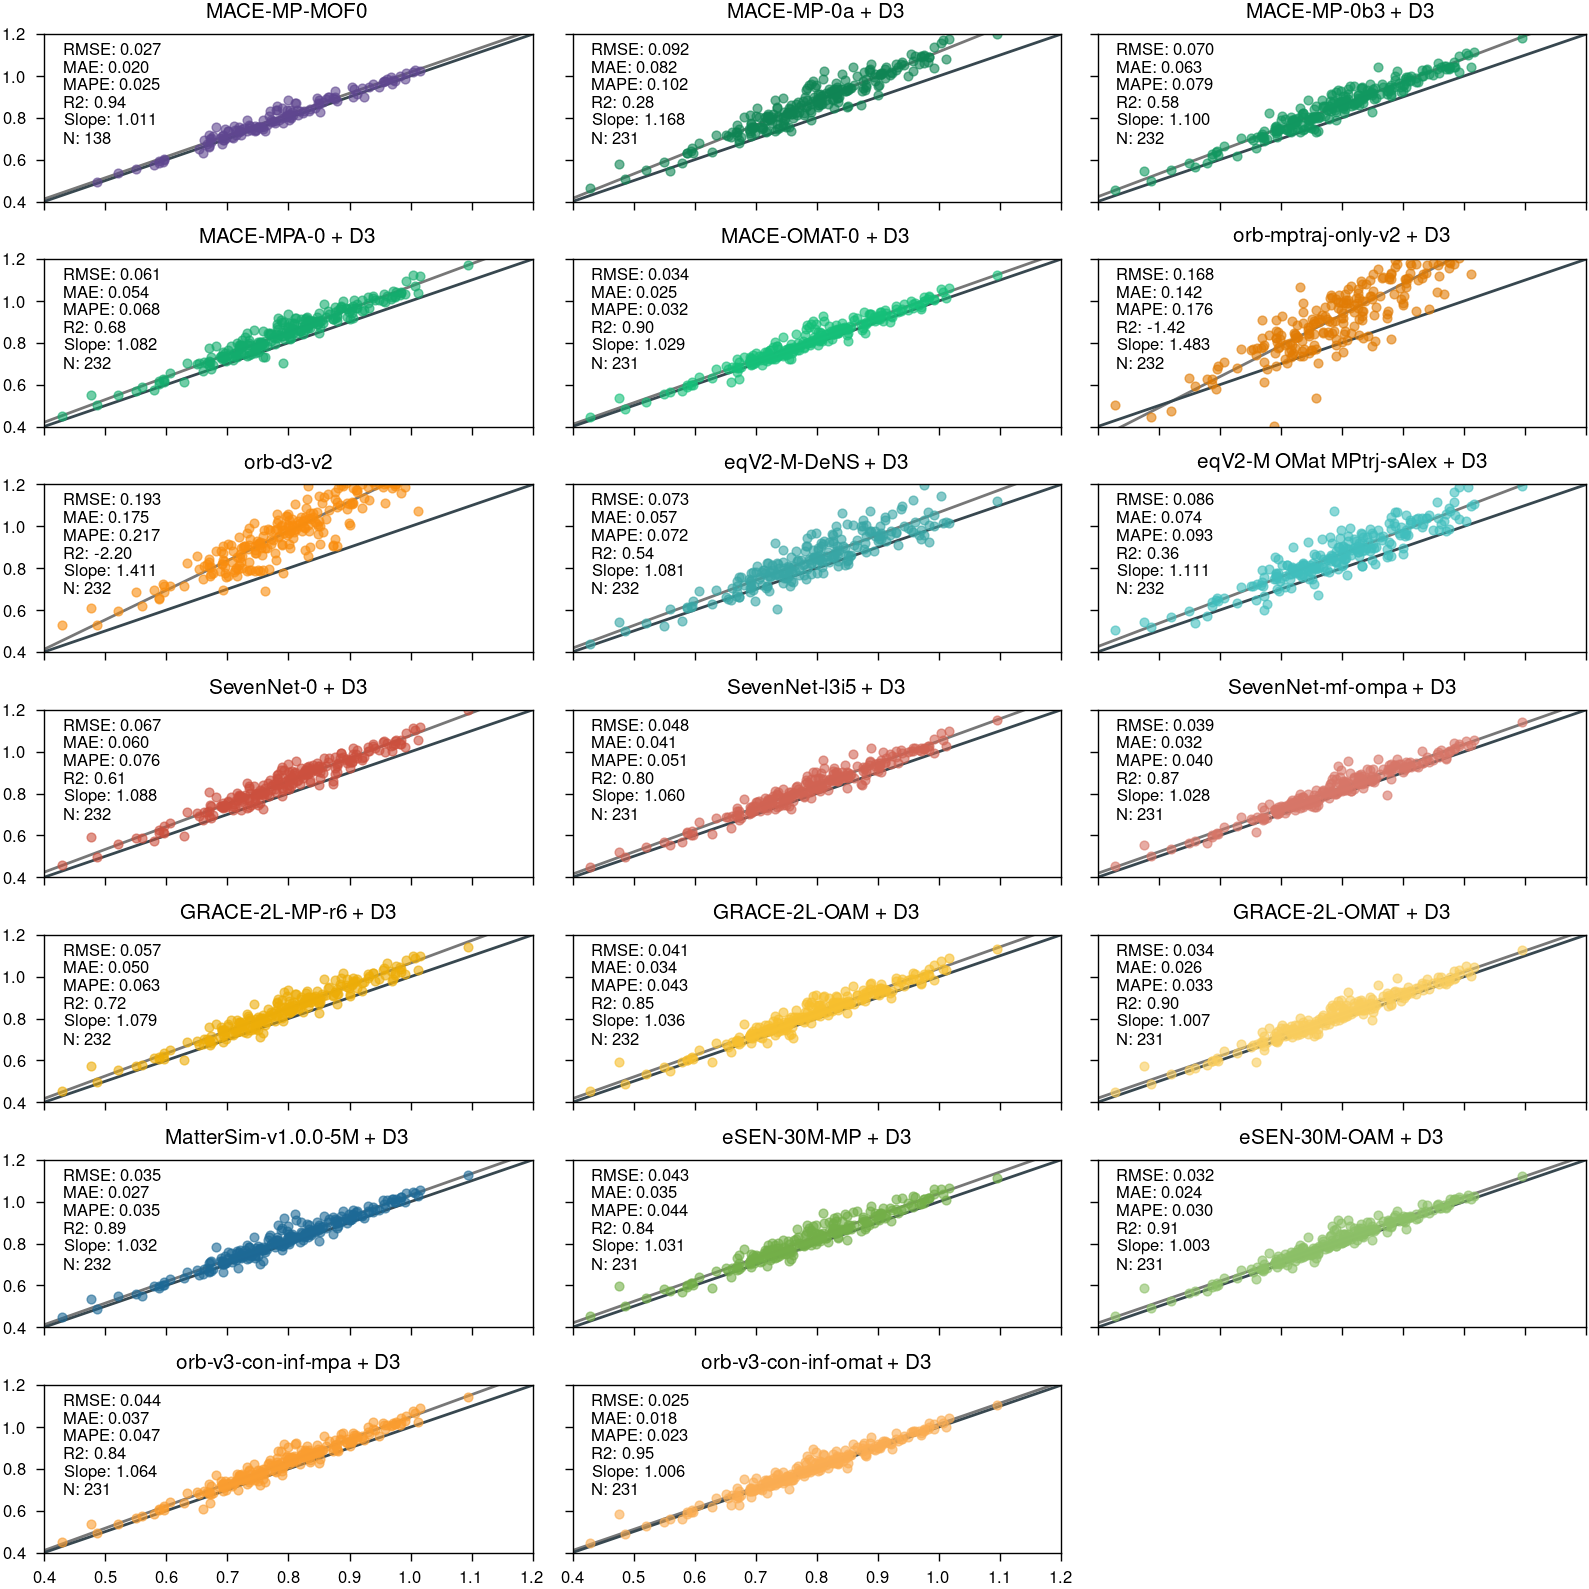

In [80]:
ncols = 3
figheight, figwidth = 8, 8

calculators = heat_capacity_df.index.get_level_values("calculator").unique()
calculators = all_calcs

nrows = int(np.ceil(len(calculators) / ncols))

fig, ax = plt.subplots(
    nrows,
    ncols,
    figsize=(figwidth, figheight),
    sharey=True,
    sharex=True,
    constrained_layout=True
)

ax = ax.ravel()

for i, calc in enumerate(calculators):

    df = heat_capacity_df[(heat_capacity_df.index.get_level_values("calculator") == calc) & (~heat_capacity_df["dft_cv"].isna())]
    df = df[(~df["dft_cv"].isna()) & (~df["cv_300"].isna())]

    rmse = root_mean_squared_error(df["dft_cv"], df["cv_300"])
    mape = mean_absolute_percentage_error(df["dft_cv"], df["cv_300"])
    mae = np.mean(np.abs(df["dft_cv"] - df["cv_300"]))
    r2 = r2_score(df["dft_cv"], df["cv_300"])
    m,b = np.polyfit(df["dft_cv"], df["cv_300"], 1)

    poly_x = np.linspace(0.4,1.2, 2)
    poly_y = poly_x * m + b
    ax[i].plot(poly_x, poly_y, c="#777", zorder=-10)
    
    ax[i].scatter(df["dft_cv"], df["cv_300"], s=10, color=cmap_all[all_calcs.index(calc)], alpha=0.6, rasterized=True)
    ax[i].plot([0.4,1.25], [0.4,1.25], c=GREY_DARK, zorder=-10)
    ax[i].set_xlim([0.4,1.2])
    ax[i].set_ylim([0.4,1.2])
    ax[i].set_title(calc_names[calc].replace("\n", " "), size=7.5)
    ax[i].text(0.04, 0.95, f"RMSE: {rmse:.3f}\nMAE: {mae:.3f}\nMAPE: {mape:.3f}\nR2: {r2:.2f}\nSlope: {m:.3f}\nN: {len(df)}", horizontalalignment="left", verticalalignment="top", transform = ax[i].transAxes, size=6)

ax[-1].axis("off")

# fig.tight_layout()
fig.set_dpi(200)
fig.savefig("figures/heat_capacity_parity_all.pdf")

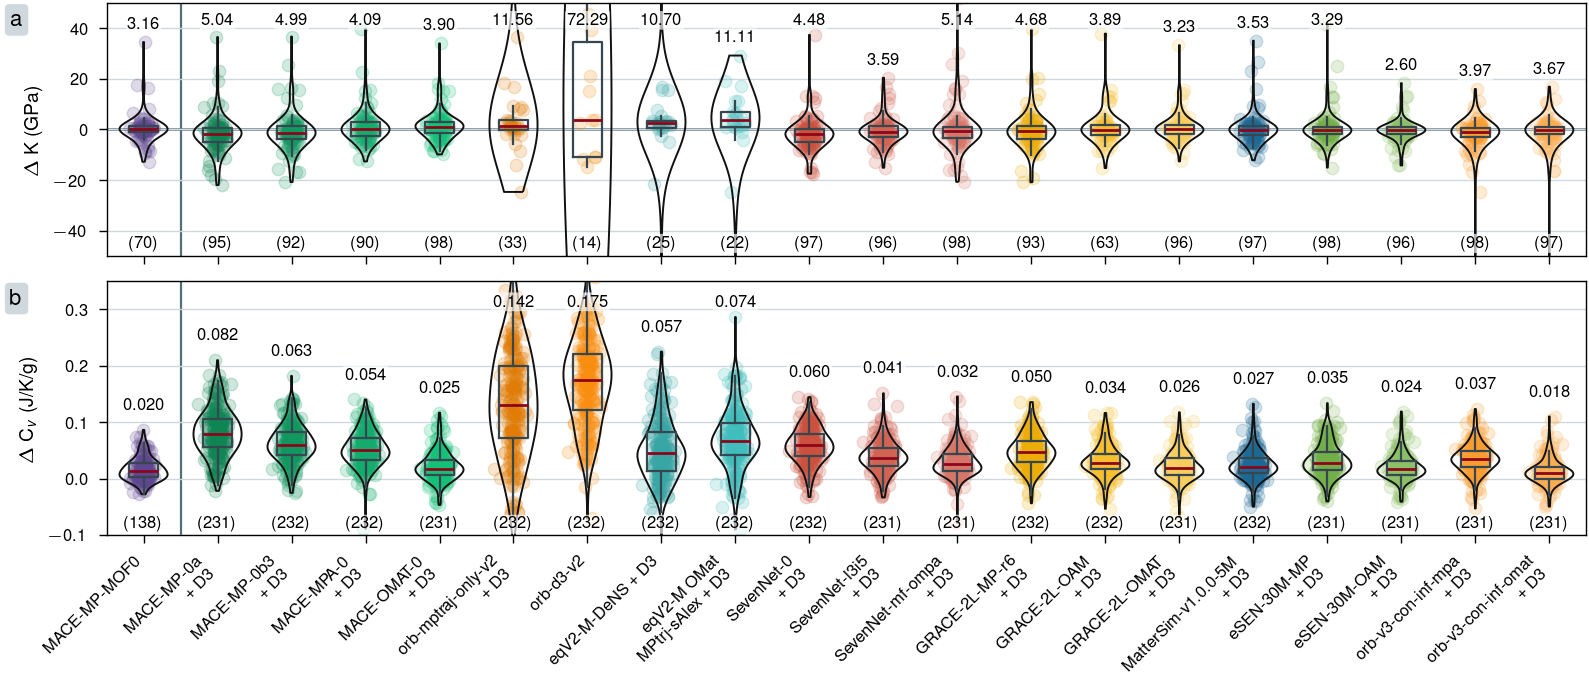

In [81]:
fig, axs = plt.subplots(2, sharex=True, figsize=(8,3.5))

ax = axs[0]
generate_violin_plot(bulk_modulus_diff, ax=ax, scatter_kwargs={"alpha": 0.2, "rasterized": True}, plot_density=False, colors=cmap_all)
ax.set_ylabel(r"$\Updelta$ K (GPa)", size=7)

if show_hlines:
    ax.grid(axis="y", color=GREY_LIGHT, lw=0.5, zorder=-100)
ax.axhline(0, color=GREY, alpha=0.8, zorder=0)
    
# vertical bar to separate MACE-MP-MOF0
ax.axvline(0.5, color=GREY, zorder=0, linewidth = 0.8)

for x, calc in enumerate(all_calcs):
    i = all_calcs.index(calc)
    ax.text(x, min(bulk_modulus_diff[i].max() + 4, 40), f"{bulk_modulus_mae[i]:.2f}", horizontalalignment="center", verticalalignment="bottom", size=6, bbox=dict(facecolor="#ffffffaa", edgecolor="None", boxstyle="round,pad=0.1"))
    ax.text(x, -48, f"({len(bulk_modulus_diff[i])})", horizontalalignment="center", verticalalignment="bottom", size=6, bbox=dict(facecolor="#ffffffaa", edgecolor="None", boxstyle="round,pad=0.1"))  

ax.set_ylim([-50, 50])
ax.annotate(
    "a",
    xy=(-0.08, 1.06), xycoords="axes fraction",
    xytext=(+1, -1), textcoords="offset fontsize",
    fontsize="8", verticalalignment="top",
    bbox=dict(facecolor=GREY_LIGHT, edgecolor="none", pad=3.0, boxstyle="round,pad=0.25,rounding_size=0.2")
)
ax.annotate(
    ".", color="#ffffff00",
    xy=(-0.085, 1.06), xycoords="axes fraction",
    xytext=(+1, -1), textcoords="offset fontsize",
    fontsize="8", verticalalignment="top",
)

ax = axs[1]

generate_violin_plot(heat_capacity_diff, ax=ax, scatter_kwargs={"alpha": 0.2, "rasterized": True}, plot_density=False, colors=cmap_all)
_ = ax.set_xticks(np.arange(len(all_calcs)), [calc_names[key] for key in all_calcs], rotation=45, ha="right")

ax.set_ylim([-0.1,0.35])
ax.set_xlim([-0.5, len(all_calcs)-0.5])
if show_hlines:
    ax.grid(axis="y", color=GREY_LIGHT, lw=0.5, zorder=-100)

# vertical bar to separate MACE-MP-MOF0
ax.axvline(0.5, color=GREY, zorder=0, linewidth = 0.8)
  
for x, calc in enumerate(all_calcs):
    i = all_calcs.index(calc)
    ax.text(x, min(heat_capacity_diff[i].max() + 0.03, 0.3), f"{heat_capacity_mae[i]:.3f}", horizontalalignment="center", verticalalignment="bottom", size=6, bbox=dict(facecolor="#ffffffaa", edgecolor="None", boxstyle="round,pad=0.1"))
    ax.text(x, -0.095, f"({len(heat_capacity_diff[i])})", horizontalalignment="center", verticalalignment="bottom", size=6, bbox=dict(facecolor="#ffffffaa", edgecolor="None", boxstyle="round,pad=0.1"))

ax.set_ylabel("$\\Updelta$ C$_v$ (J/K/g)", size=7)
ax.annotate(
    "b",
    xy=(-0.08, 1.06), xycoords="axes fraction",
    xytext=(+1, -1), textcoords="offset fontsize",
    fontsize="8", verticalalignment="top",
    bbox=dict(facecolor=GREY_LIGHT, edgecolor="none", pad=3.0, boxstyle="round,pad=0.25,rounding_size=0.2")
)

fig.set_dpi(200)
fig.savefig("figures/bm_hc_all.pdf")

# Interaction energy

In [82]:
ie_df = pd.read_parquet("../results/interaction_energy_results.parquet")

In [83]:
energy_mae_all = ie_df.groupby("calculator")["interaction_energy_mae"].mean()
energy_mae = ie_df.groupby(["calculator", "type"])["interaction_energy_mae"].mean()

In [84]:
force_mae_all = ie_df.groupby("calculator")["force_mae"].mean()
force_mae = ie_df.groupby(["calculator", "type"])["force_mae"].mean()

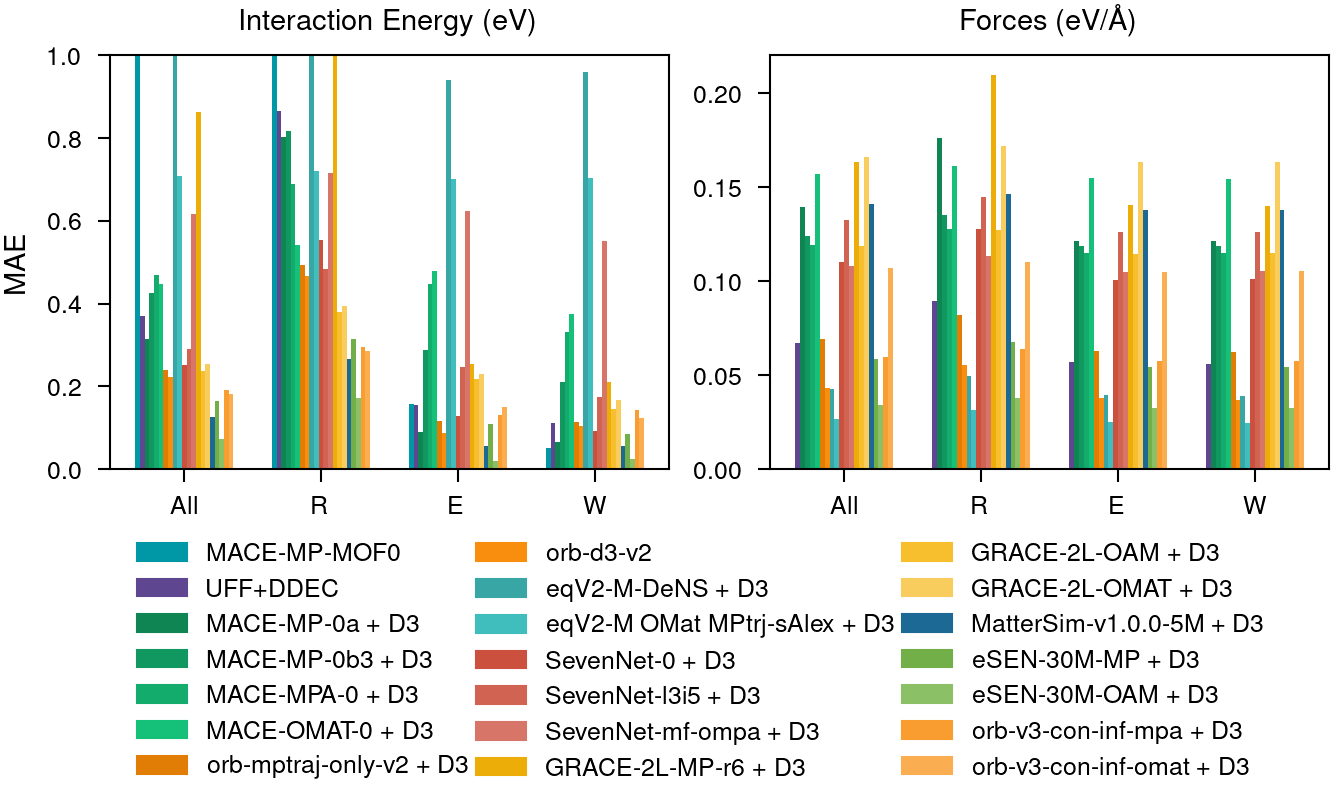

In [85]:
fig, ax = plt.subplots(1, 2, figsize=(4.5,1.8))

calcs = all_calcs

width_1 = 1.5 / (len(calcs)+2)
x_1 = np.linspace(0, width_1 * (len(calcs)),len(calcs)+1)
width_2 = 1.5 / (len(all_calcs)+1)
x_2 = np.linspace(0, width_2 * (len(calcs)-1),len(calcs))
    
colors = cmap_all
ax[0].bar(x_1, [50.434] + energy_mae_all[calcs].values.tolist(), width_1, label="All", color = ["#0097A7"] + colors)
ax[0].bar(x_1 + 2, [151.147] + energy_mae[:, "R"][calcs].values.tolist(), width_1, label="R", color = ["#0097A7"] + colors)
ax[0].bar(x_1 + 4, [0.157] + energy_mae[:, "E"][calcs].values.tolist(), width_1, label="E", color = ["#0097A7"] + colors)
ax[0].bar(x_1 + 6, [0.050] + energy_mae[:, "P"][calcs].values.tolist(), width_1, label="W", color = ["#0097A7"] + colors)

ax[1].bar(x_2, force_mae_all[calcs].values, width_2, label="All", color = colors)
ax[1].bar(x_2 + 2, force_mae[:, "R"][calcs].values, width_2, label="R", color = colors)
ax[1].bar(x_2 + 4, force_mae[:, "E"][calcs].values, width_2, label="E", color = colors)
ax[1].bar(x_2 + 6, force_mae[:, "P"][calcs].values, width_2, label="W", color = colors)

lines = [mpatches.Patch(color=c) for c in ["#0097A7"] + colors]
labels = [calc_names[key].replace("\n", " ") for key in calcs]
labels.insert(1, "UFF+DDEC")

fig.legend(
    lines,
    labels,
    loc=1,
    bbox_to_anchor=(0.1, 0.1, 0.85, -.102), 
    ncol=3,
    mode="expand",
    borderaxespad=0,
    frameon=False
)


ax[0].set_xticks(0.75+np.arange(0,7,2) - width_2, ["All", "R", "E", "W"])
ax[1].set_xticks(0.75+np.arange(0,7,2) - width_2, ["All", "R", "E", "W"])
ax[0].set_ylabel("MAE", size=7)
ax[0].set_ylim([0,1])

ax[0].set_title("Interaction Energy (eV)", size=7)
ax[1].set_title("Forces (eV/\\AA)", size=7)

fig.set_dpi(300)
fig.savefig("figures/dac.pdf", dpi=300)